读取实测数据

In [1]:
import csv#引入库包
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from sklearn.metrics import mean_squared_error
data_obs = []  # 用列表存储每年的数据

for year in range(1979, 1988):
    # 使用正确的路径格式
    df_year = pd.read_csv('D:/CSSP/out_data/tuotuoriver/data/{}.csv'.format(year))  
    data_obs.extend(df_year['volume'].values)  # 使用 extend 方法逐年追加数据

# 将累积的数据转换为 numpy 数组
observedDataArray = np.array(data_obs)

smb_path = r'D:\Data\青藏高原七条冰川长时间序列物质平衡重构数据集（1975-2013）/QTP_Glacier MB.xlsx'
data_smb = pd.read_excel(smb_path,sheet_name='Sheet1')
data_smb_array  = np.array(data_smb)


C:\Users\DELL\AppData\Local\Temp\ipykernel_15120\605659651.py:13: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_year = pd.read_csv('D:/CSSP/out_data/tuotuoriver/data/{}.csv'.format(year))
C:\Users\DELL\AppData\Local\Temp\ipykernel_15120\605659651.py:13: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_year = pd.read_csv('D:/CSSP/out_data/tuotuoriver/data/{}.csv'.format(year))
C:\Users\DELL\AppData\Local\Temp\ipykernel_15120\605659651.py:13: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_year = pd.read_csv('D:/CSSP/out_data/tuotuoriver/data/{}.csv'.format(year))
C:\Users\DELL\AppData\Local\Temp\ipykernel_15120\605659651.py:13: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_year = pd.read_csv('D:/CSSP/out_data/tuotuoriver/data/{}.csv'.format(year))


In [2]:
observedDataArray 

array(['0.496', '0.475', '0.452', ..., 'nan', 'nan', 'nan'], dtype='<U32')

读取模拟数据

In [3]:

dm_year = pd.read_csv('D:/CSSP/out_data/years_DCHRG_data.csv')#修改前数据
model=[]
df = pd.read_csv('D:/CSSP/out_data/years_DCHRG_data.csv')
for year in range(1979, 1988):
    df_year = df[str(year)]
    for i in range(366):
     value = df_year.iloc[i,]  
     if not np.isnan(value):#剔除平年里的缺测值
        model.append(value)
modelDataArray0 = np.array(model)

def is_leap_year(year):
    # 判断是否为闰年
    return (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)
def read_csv(csv_path,yb,ye):#读取csv数据并转化成一维数组csv格式为colmon19xx加数据
    df = pd.read_csv(csv_path)#csv数据
    model=[]
    for year in range(yb,ye):
        df_year = df[str(year)]
        for i in range(366):
            value = df_year.iloc[i,] 
            if not np.isnan(value):#剔除平年里的缺测值
                model.append(value)
    DataArray = np.array(model)#转为数组便于处理
    return DataArray

#def read_csv(csv_path, yb, ye):
#    df = pd.read_csv(csv_path)  # 读取CSV文件
#    model = []
#    
#    # 筛选年份范围内的列
#    years = [str(year) for year in range(yb, ye + 1)]  # 转换年份为字符串
#    df_filtered = df[years]  # 选择指定年份的列
    
    # 将数据逐行加入 model 列表中,忽略 NaN 值
#    for year_data in df_filtered.values.flatten():
#            model.append(year_data)
#    
#    DataArray = np.array(model)  # 转为数组便于处理
#    return DataArray



def read_csv_and_sum(csv_path, yb, ye):
    """
    读取 CSV 文件并计算每年的总和.

    参数:
        csv_path (str): CSV 文件路径.
        yb (int): 起始年份.
        ye (int): 结束年份(包含在计算范围内).

    返回:
        np.array: 包含每年总和的 NumPy 数组.
    """
    try:
        # 读取 CSV 文件,确保列名是字符串类型
        df = pd.read_csv(csv_path)
        df.columns = df.columns.astype(str)  # 将列名转换为字符串
    except Exception as e:
        print(f"读取 CSV 文件时出错: {e}")
        return np.array([])

    annual_sums = []  # 列表存储每年的总和

    for year in range(yb, ye + 1):  # 包含结束年份
        year_str = str(year)  # 将年份转换为字符串
        if year_str in df.columns:
            df_year = df[year_str]  # 选择该年的数据
            # 将数据转换为数值类型,非数值转换为 NaN
            df_year = pd.to_numeric(df_year, errors='coerce')
            sum_for_year = df_year.sum(skipna=True)  # 计算总和,跳过 NaN
            annual_sums.append(sum_for_year)
        else:
            annual_sums.append(np.nan)  # 如果年份列不存在,则添加 NaN

    return np.array(annual_sums)  # 将列表转换为 NumPy 数组


#冰川V—A_scaling公式
def V_A(c,t,A):
    V =c*np.abs(A)**t
    if A > 0:
        V = V
    else:   
        V = -V
    return V
########################水文模型计算指标###########################################
#纳什效率系数
import numpy as np

def nash_efficiency(observed, simulated):
    """
    计算纳什效率系数 (Nash-Sutcliffe efficiency coefficient)

    参数:
        observed: 观测值列表或NumPy数组
        simulated: 模拟值列表或NumPy数组

    返回值:
        纳什效率系数 (NSE). 如果分母为零,则返回np.nan.
    """
    observed = np.array(observed)
    simulated = np.array(simulated)

    if len(observed) != len(simulated):
        raise ValueError("观测值和模拟值的长度必须相等")

    if len(observed) == 0:
        return np.nan # 处理空数组的情况

    mean_observed = np.mean(observed)
    numerator = np.sum((observed - simulated)**2)
    denominator = np.sum((observed - mean_observed)**2)

    if denominator == 0:
        return np.nan #避免除零错误

    nash_coefficient = 1 - (numerator / denominator)
    return nash_coefficient


#KGE对峰值比较敏感
def calculate_KGE(simulated, observed):
    # Calculate the correlation coefficient (r)
    
    r = np.corrcoef(simulated, observed)[0, 1]

    # Calculate alpha and beta
    alpha = np.std(simulated) / np.std(observed)
    beta = np.mean(simulated) / np.mean(observed)

    # Calculate KGE
    kge = 1 - np.sqrt((r - 1)**2 + (alpha - 1)**2 + (beta - 1)**2)

    return kge
#相关系数
def calculate_pearson_correlation(array1, array2):
    """
    计算两个数组之间的皮尔逊相关系数.

    参数:
    - array1: 第一个数组.
    - array2: 第二个数组.

    返回:
    - correlation: 两个数组之间的皮尔逊相关系数.
    """
    # 确保两个数组长度相同
    if len(array1) != len(array2):
        raise ValueError("两个数组长度必须相同.")
    
    # 使用NumPy的corrcoef函数计算相关系数矩阵
    correlation_matrix = np.corrcoef(array1, array2)
    
    # 相关系数矩阵的[0, 1]元素是两个数组之间的相关系数
    correlation = correlation_matrix[0, 1]
    print( correlation )
    return correlation
#均方根误差
def rmse(y_true, y_pred):
    """
    计算RMSE
    参数:
        y_true: 真实值
        y_pred: 预测值 
    返回:
        rmse: 均方根误差
    """

    mse = np.mean((y_true - y_pred)**2)
    rmse = np.sqrt(mse)

    return rmse



In [4]:
smb_years = read_csv_and_sum('D:/CSSP/out_data/CSSPsurface_SMB5.csv',1979,2017)
cosipy_mb = read_csv_and_sum('D:/CSSP/out_data/DKMD/cosipy_1979_2013_MB_daily.csv',1979,2014)

In [5]:
#CSSP_glctest_tg1 = read_csv('D:\code\python/CSSPsurface_TG_glc.csv',1979,1987)
#CSSP_noglc_tg = read_csv('D:/code/python/CSSPsurface_TG.csv',1979,1987)
#CSSP_glctest_tg1 = np.array_split(CSSP_glctest_tg1,84)
#month_tg_data = np.array([np.mean(month) for month in CSSP_glctest_tg1])#模拟月径流
#CSSP_noglc_tg = np.array_split(CSSP_noglc_tg ,84)
#month_tg_data2 = np.array([np.mean(month) for month in CSSP_noglc_tg])#模拟月径流
CSSP_glctest_tg_2008 = read_csv('D:/CSSP/out_data/CSSPsurface_TG_TTH.csv',2008,2009)
CSSP_glctest_tg_2008 = np.array(CSSP_glctest_tg_2008)
CSSP_noglc_tg_2008 = read_csv('D:/CSSP/out_data/CSSPsurface_TG_TTHnoglc.csv',2008,2009)
CSSP_noglc_tg_2008 = np.array(CSSP_noglc_tg_2008)
rs_tg1 = read_csv('daily_TG_average_day.csv',2008,2009)
#rs_tg2 = read_csv('daily_TG_average_night.csv',2008,2009)

In [6]:
#COSipy_glc_2008 = df = pd.read_csv('D:/code/python/cosipy2008ts.csv')
#s =np.array(COSipy_glc_2008)
#COSipy_glc_2008_hour = s[:,1]
# 初始化一个数组来存储每天的平均值
#COSipy_glc_2008_day = np.zeros(366)

# 计算每天的平均值
#for i in range(366):
#    start_index = i * 24
#    end_index = (i + 1) * 24
#    COSipy_glc_2008_day[i] = np.mean(COSipy_glc_2008_hour[start_index:end_index])

多年连续径流绘图

In [7]:


rain_APCP = pd.read_csv("D:/CSSP/out_data/surface_PRE_data.csv")#降雨量数据
rain_APCP2 = pd.read_csv("D:/CSSP/out_data/surface_PRE_dataTH2.csv")#降雨量数据
rain_APCParray = []
rain_APCParray2 = []
rain_APCP = np.array(rain_APCP)
rain_APCP2 = np.array(rain_APCP2)
for year in range(9):   
    for days in range(366):
        if np.isnan(rain_APCP[days,year]):
            continue
        rain_APCParray.append(rain_APCP[days,year])
for year in range(9):   
    for days in range(366):
        if np.isnan(rain_APCP2[days,year]):
            continue
        rain_APCParray2.append(rain_APCP2[days,year])


modelDataArrayglc1 = read_csv('D:/CSSP/out_data/years_DCHRG_data_glc_1.csv',1979,1986)
modelDataArrayglc2 = read_csv('D:/CSSP/out_data/years_DCHRG_data_noglc_1.csv',1979,1986)
modelDataArrayGLDD = read_csv('D:/CSSP/out_data/years_DCHRG_data_GLDD1.csv',1979,2017)
modelDataArray39years = read_csv('D:/CSSP/out_data/years_DCHRG_data_39years.csv',1979,2017)
modelDataArray39years1 = read_csv('D:/CSSP/out_data/years_DCHRG_data_39years2.csv',1979,2017)
forcingdata_APCP =  read_csv('D:/CSSP/out_data/forcing_mean.csv',1979,2017)
forcingdatatuotuohe_APCP =  read_csv('D:/CSSP/out_data/forcing_mean_tuotuoheriver.csv',1979,2017)
moderDataArraysmb5= read_csv('D:/CSSP/out_data/CSSPsurface_SMB5.csv',1979,2017)
moderDataArraysmb8= read_csv_and_sum('D:/CSSP/out_data/CSSPsurface_SMB8.csv',1979,2016)

modelDataArraysmb_DKMD57 = read_csv_and_sum('D:/CSSP/out_data/CSSPsurface_SMB_DKMD57.csv',1979,2016)
modelDataArraysmb_DKMD571 = read_csv_and_sum('D:/CSSP/out_data/CSSPsurface_SMB_DKMD57.1.csv',1979,2016)


In [8]:
prep_TPHirpr = read_csv_and_sum('D:/CSSP/out_data/prep_TPHIPR.csv',1979,2016)
zhimenda_obs = read_csv('D:\Data/zhimenda.csv',2008,2018)
zhimenda_CSSP = read_csv('D:/CSSP/out_data/YZR_DCHRG_zhimenda.csv',2008,2018)
#$YZR_TG_MODIS = read_csv('D:\code\python/daily_TG_average.csv',2008,2018)
#YZR_TG_MODISN = read_csv('D:\code\python/daily_TG_average_night.csv',2008,2018)
YZR_TG_CSSP = read_csv('D:/CSSP/out_data/CSSPsurface_TG_YZR.csv',2008,2018)
YZR_APCP = read_csv('D:/CSSP/out_data/forcing_mean_YZR.csv',2008,2018)



In [9]:
#calculate_KGE(zhimenda_obs,zhimenda_CSSP)
#nash_efficiency(zhimenda_obs,zhimenda_CSSP)
modelDataArraysmb_cosipyGLDD = read_csv_and_sum('D:/CSSP/out_data/DKMD/COSIPYMB_DKMD.csv',1979,2016)

In [10]:
modelDataArraysmb_DKMD = read_csv_and_sum('D:/CSSP/out_data/CSSPsurface_SMB_DKMD1.csv',1979,2016)
modelDataArraysmb_DKMD67_sm = read_csv_and_sum('D:/CSSP/out_data/CSSPsurface_sm_DKMD67.csv',1979,2016)
modelDataArraysmb_DKMD67_msub = read_csv_and_sum('D:/CSSP/out_data/CSSPsurface_msub_DKMD67.csv',1979,2016)
modelDataArraysmb_DKMD67_smelt = read_csv_and_sum('D:/CSSP/out_data/CSSPsurface_smelt_DKMD67.csv',1979,2016)
tuotuohe = read_csv('D:/CSSP/out_data/TTH_DCHRG_glc2.csv',1979,1988)
tuotuohe.shape

(3287,)

月径流计算

In [11]:
#DKMD_data = np.array(modelDataArraysmb_DKMD[:30])
DKMD_data1 = np.array(data_smb_array[:,4])
modelDataArraysmb_cosipyDKMD = np.array(modelDataArraysmb_cosipyGLDD)

In [12]:
modelDataArrayTG_SJY = read_csv('D:/CSSP/out_data/SJY/CSSPsurface_TG_SJY_noGLC2.csv',2001,2016)
modelDataArrayTG_SJY_GLC = read_csv('D:/CSSP/out_data/SJY/CSSPsurface_TG_SJYGLC_GLC2.csv',2001,2016)
modelDataArrayTG_SJY_msd = read_csv('D:/CSSP/out_data/SJY/daily_TG_average_day_2001_2017.csv',2001,2016)
modelDataArrayTG_SJY_msn = read_csv('D:/CSSP/out_data/SJY/daily_TG_average_night_2001_2017.csv',2001,2016)
print(modelDataArrayTG_SJY_msd.shape)

(5478,)


In [13]:

DKMD_datanew1 = read_csv_and_sum('D:/CSSP/out_data/DKMD/CSSPsurface_SMB_DKMD_new1.csv',1979,2016)
DKMD_datanew2 = read_csv_and_sum('D:/CSSP/out_data/DKMD/CSSPsurface_SMB_DKMD_new2.csv',1979,2016)
DKMD_datanew3 = read_csv_and_sum('D:/CSSP/out_data/DKMD/CSSPsurface_SMB_DKMD_new3.csv',1979,2016)
modelDataArraysmb_DKMD1 = read_csv_and_sum('D:\CSSP\out_data\DKMD/CSSPsurface_SMB_DKMD1.csv',1979,2016)
modelDataArraysmb_DKMD2 = read_csv_and_sum('D:\CSSP\out_data\DKMD/CSSPsurface_SMB_DKMD2.csv',1979,2016)
modelDataArraysmb_DKMD3 = read_csv_and_sum('D:\CSSP\out_data\DKMD/CSSPsurface_SMB_DKMD3.csv',1979,2016)
smb = read_csv_and_sum('D:\CSSP\out_data\DKMD/CSSPsurface_SMB_DKMD_ctl.csv',1979,2017)
#melt = read_csv_and_sum('D:\CSSP\out_data\DKMD/CSSPsurface_MELT_GLACIER_DKMD_ctl.csv',1979,2017)
fseng = read_csv_and_sum('D:\CSSP\out_data\DKMD/CSSPsurface_FSENG_GLACIER_DKMD_nomelt.csv',1979,2017)

smbre = read_csv_and_sum('D:\CSSP\out_data\DKMD/CSSPsurface_SMB_DKMD_restart.csv',1979,2017)
meltre = read_csv_and_sum('D:\CSSP\out_data\DKMD/CSSPsurface_MELT_GLACIER_DKMD_restart.csv',1979,2017)
fsengre = read_csv_and_sum('D:\CSSP\out_data\DKMD/CSSPsurface_FSENG_GLACIER_DKMD_restart.csv',1979,2017)
fgrndre = read_csv_and_sum('D:\CSSP\out_data\DKMD/CSSPsurface_FGRND_GLACIER_DKMD_restart.csv',1979,2017)
fevpgre = read_csv_and_sum('D:\CSSP\out_data\DKMD/CSSPsurface_FEVPG_GLACIER_DKMD_restart.csv',1979,2017)

smb_refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_refreeze2.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_refreeze2.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_refreeze2.csv', 1979, 2017)
msub = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FEVPG_GLACIER_DKMD_refreeze2.csv', 1979, 2017)
fgrnd = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FGRND_GLACIER_DKMD_refreeze2.csv', 1979, 2016)
smb_refreeze2 = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_refreeze3.csv', 1979, 2017)
smb_refreeze3 = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_refreeze4.csv', 1979, 2017)
refreeze3 = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_refreeze4.csv', 1979, 2017)
melt3 =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_refreeze4.csv', 1979, 2017)

smb_refreeze5 = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_refreeze5.csv', 1979, 2017)
refreeze5 = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_refreeze5.csv', 1979, 2017)
melt5 =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_refreeze5.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FGRND_GLACIER_DKMD_refreeze5.csv', 1979, 2017)

smb_refreeze6 = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_refreeze6.csv', 1979, 2017)
refreeze5 = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_refreeze5.csv', 1979, 2017)
melt5 =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_refreeze5.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FGRND_GLACIER_DKMD_refreeze6.csv', 1979, 2017)

smb_refreeze7 = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_refreeze7.csv', 1979, 2017)
refreeze5 = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_refreeze5.csv', 1979, 2017)
melt5 =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_refreeze5.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FGRND_GLACIER_DKMD_refreeze7.csv', 1979, 2017)

smb_refreeze9 = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_refreeze9.csv', 1979, 2017)
refreeze5 = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_refreeze9.csv', 1979, 2017)
melt5 =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_refreeze9.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FGRND_GLACIER_DKMD_refreeze9.csv', 1979, 2017)
smb_refreeze10 = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_refreeze10.csv', 1979, 2017)
refreeze5 = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_refreeze10.csv', 1979, 2017)
melt5 =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_refreeze9.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FGRND_GLACIER_DKMD_refreeze9.csv', 1979, 2017)
smb_refreeze11 = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_refreeze11.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_refreeze11.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_refreeze11.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FGRND_GLACIER_DKMD_refreeze11.csv', 1979, 2017)
smb_refreeze12 = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_refreeze12.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_refreeze12.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_refreeze12.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FGRND_GLACIER_DKMD_refreeze12.csv', 1979, 2017)
smb_refreeze13 = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_refreeze13.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_refreeze13.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_refreeze13.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FGRND_GLACIER_DKMD_refreeze13.csv', 1979, 2017)

In [36]:

smb_refreeze13 = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v1.0.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v1.0.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v1.0.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FGRND_GLACIER_DKMD_v1.0.csv', 1979, 2017)
smb_refreeze14 = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v1.1.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v1.1.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v1.1.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FGRND_GLACIER_DKMD_v1.1.csv', 1979, 2017)
smb_refreeze15 = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v1.2.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v1.2.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v1.2.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FGRND_GLACIER_DKMD_v1.2.csv', 1979, 2017)
smb_refreeze16 = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v1.3.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v1.3.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v1.3.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FGRND_GLACIER_DKMD_v1.3.csv', 1979, 2017)
smb_refreeze17 = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v1.4.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v1.4.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v1.4.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FGRND_GLACIER_DKMD_v1.4.csv', 1979, 2017)
smb_refreeze18 = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v1.5.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v1.5.csv', 1979, 2017)
#melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v1.5.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FGRND_GLACIER_DKMD_v1.5.csv', 1979, 2017)
smb_refreeze19 = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v1.6.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v1.6.csv', 1979, 2017)
#melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v1.5.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FGRND_GLACIER_DKMD_v1.6.csv', 1979, 2017)
smb_refreeze20 = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v1.7.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v1.7.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v1.7.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FGRND_GLACIER_DKMD_v1.7.csv', 1979, 2017)
smb_refreeze21 = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v1.8.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v1.8.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v1.8.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FGRND_GLACIER_DKMD_v1.8.csv', 1979, 2017)
smb_refreeze22 = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v1.9.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v1.9.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v1.9.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FGRND_GLACIER_DKMD_v1.9.csv', 1979, 2017)
smb_refreeze23 = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v2.0.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v2.0.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v2.0.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FGRND_GLACIER_DKMD_v2.0.csv', 1979, 2017)
smb = read_csv(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v2.0.csv', 1979, 2017)
smb_refreeze24 = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v2.1.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v2.1.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v2.1.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FGRND_GLACIER_DKMD_v2.1.csv', 1979, 2017)
smb_refreeze25 = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v2.2.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v2.2.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v2.2.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FGRND_GLACIER_DKMD_v2.2.csv', 1979, 2017)

smb_refreeze26 = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v2.4.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v2.4.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v2.4.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FGRND_GLACIER_DKMD_v2.4.csv', 1979, 2017)
smb_refreeze27 = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v2.5.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v2.5.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v2.5.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FGRND_GLACIER_DKMD_v2.5.csv', 1979, 2017)
smb_refreeze28 = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v2.6.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v2.6.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v2.6.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FGRND_GLACIER_DKMD_v2.6.csv', 1979, 2017)
smb_refreeze29 = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v2.7.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v2.7.csv', 1979, 2017)
melt29 =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v2.7.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FGRND_GLACIER_DKMD_v2.7.csv', 1979, 2017)

smb_refreeze30 = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v2.8.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v2.8.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v2.8.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FGRND_GLACIER_DKMD_v2.8.csv', 1979, 2017)

smb_refreeze31 = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v2.9.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v2.9.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v2.9.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FGRND_GLACIER_DKMD_v2.9.csv', 1979, 2017)

smb_refreeze32 = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v3.0.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v3.0.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v3.0.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FGRND_GLACIER_DKMD_v3.0.csv', 1979, 2017)

smb_refreeze33 = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v3.1.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v3.1.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v3.1.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FGRND_GLACIER_DKMD_v3.1.csv', 1979, 2017)

smb_refreeze34 = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v3.2.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v3.1.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v3.1.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FGRND_GLACIER_DKMD_v3.1.csv', 1979, 2017)

smb_refreeze35 = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v3.3.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v3.3.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v3.3.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FGRND_GLACIER_DKMD_v3.3.csv', 1979, 2017)

smb_refreeze36 = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v3.4.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v3.4.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v3.4.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FGRND_GLACIER_DKMD_v3.4.csv', 1979, 2017)

smb_refreeze37 = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v3.5.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v3.5.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v3.5.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FGRND_GLACIER_DKMD_v3.5.csv', 1979, 2017)

smb_refreeze38 = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v3.6.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v3.6.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v3.6.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FGRND_GLACIER_DKMD_v3.6.csv', 1979, 2017)

smb_refreeze39 = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v3.7.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v3.7.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v3.7.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FGRND_GLACIER_DKMD_v3.7.csv', 1979, 2017)
smb_refreeze40 = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v3.8.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v3.8.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v3.8.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FGRND_GLACIER_DKMD_v3.8.csv', 1979, 2017)
smb_refreeze41 = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v3.9.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v3.9.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v3.9.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FGRND_GLACIER_DKMD_v3.9.csv', 1979, 2017)
smb_refreeze42 = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v4.0.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v4.0.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v4.0.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FGRND_GLACIER_DKMD_v4.0.csv', 1979, 2017)
smb_refreeze43 = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v4.1.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v4.1.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v4.1.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FGRND_GLACIER_DKMD_v4.1.csv', 1979, 2017)

smb_refreeze44 = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v4.2.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v4.2.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v4.2.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FGRND_GLACIER_DKMD_v4.2.csv', 1979, 2017)
smb_refreeze45 = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v4.3.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v4.3.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v4.3.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FGRND_GLACIER_DKMD_v4.3.csv', 1979, 2017)

smb_refreeze46 = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v4.4.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v4.4.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v4.4.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FGRND_GLACIER_DKMD_v4.4.csv', 1979, 2017)

smb_refreeze47 = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v4.5.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v4.5.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v4.5.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FGRND_GLACIER_DKMD_v4.5.csv', 1979, 2017)


smb_refreeze48 = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v4.6.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v4.6.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v4.6.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FGRND_GLACIER_DKMD_v4.6.csv', 1979, 2017)
DLWRF =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\DLWRF_forcing_mean_DKMD_corr.csv', 1979, 2017)
DSWRF =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\DSWRF_forcing_mean_DKMD_corr.csv', 1979, 2017)
U = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\U_forcing_mean_DKMD_corr.csv', 1979, 2017)

smb_refreeze49 = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v4.7.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v4.7.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v4.7.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FGRND_GLACIER_DKMD_v4.7.csv', 1979, 2017)
smb_refreeze50 = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v4.8.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v4.8.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v4.8.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:/CSSP/out_data/DKMD/CSSPsurface_FGRND_GLACIER_DKMD_v4.8.csv', 1979, 2017)

smb_refreeze51 = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v4.9.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v4.9.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v4.9.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:/CSSP/out_data/DKMD/CSSPsurface_FGRND_GLACIER_DKMD_v4.9.csv', 1979, 2017)
smb_refreeze52= read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v5.0.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v5.0.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v5.0.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:/CSSP/out_data/DKMD/CSSPsurface_FGRND_GLACIER_DKMD_v5.0.csv', 1979, 2017)

smb_refreeze53= read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v5.1.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v5.1.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v5.1.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:/CSSP/out_data/DKMD/CSSPsurface_FGRND_GLACIER_DKMD_v5.1.csv', 1979, 2017)
smb_refreeze54= read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v5.2.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v5.3.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v5.3.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:/CSSP/out_data/DKMD/CSSPsurface_FGRND_GLACIER_DKMD_v5.3.csv', 1979, 2017)
smb_refreeze= read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v_ctl.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v_ctl.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v_ctl.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:/CSSP/out_data/DKMD/CSSPsurface_FGRND_GLACIER_DKMD_v_ctl.csv', 1979, 2017)
smb_refreeze55= read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v5.4.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v5.4.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v5.4.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:/CSSP/out_data/DKMD/CSSPsurface_FGRND_GLACIER_DKMD_v5.4.csv', 1979, 2017)
smb_refreeze56= read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v5.5.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v5.5.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v5.5.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:/CSSP/out_data/DKMD/CSSPsurface_FGRND_GLACIER_DKMD_v5.5.csv', 1979, 2017)

smb_refreeze57= read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v5.6.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v5.6.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v5.6.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:/CSSP/out_data/DKMD/CSSPsurface_FGRND_GLACIER_DKMD_v5.6.csv', 1979, 2017)

smb_refreeze58= read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v5.7.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v5.7.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v5.7.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:/CSSP/out_data/DKMD/CSSPsurface_FGRND_GLACIER_DKMD_v5.7.csv', 1979, 2017)
smb_refreeze59= read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v5.8.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v5.8.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v5.8.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:/CSSP/out_data/DKMD/CSSPsurface_FGRND_GLACIER_DKMD_v5.8.csv', 1979, 2017)
smb_refreeze60= read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v5.9.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v5.9.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v5.9.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:/CSSP/out_data/DKMD/CSSPsurface_FGRND_GLACIER_DKMD_v5.9.csv', 1979, 2017)

smb_refreeze60= read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v6.0.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v6.0.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v6.0.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:/CSSP/out_data/DKMD/CSSPsurface_FGRND_GLACIER_DKMD_v6.0.csv', 1979, 2017)

smb_refreeze62= read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v6.2.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v6.2.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v6.2.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:/CSSP/out_data/DKMD/CSSPsurface_FGRND_GLACIER_DKMD_v6.2.csv', 1979, 2017)

smb_refreeze63= read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v6.3.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v6.3.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v6.3.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:/CSSP/out_data/DKMD/CSSPsurface_FGRND_GLACIER_DKMD_v6.2.csv', 1979, 2017)
smb_refreeze64= read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v6.4.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v6.4.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v6.4.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:/CSSP/out_data/DKMD/CSSPsurface_FGRND_GLACIER_DKMD_v6.4.csv', 1979, 2017)

smb_refreeze65= read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v6.5.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v6.5.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v6.5.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:/CSSP/out_data/DKMD/CSSPsurface_FGRND_GLACIER_DKMD_v6.5.csv', 1979, 2017)
smb_refreeze66= read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v6.6.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v6.6.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v6.6.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:/CSSP/out_data/DKMD/CSSPsurface_FGRND_GLACIER_DKMD_v6.6.csv', 1979, 2017)
smb_refreeze67= read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v6.7.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v6.7.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v6.7.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:/CSSP/out_data/DKMD/CSSPsurface_FGRND_GLACIER_DKMD_v6.7.csv', 1979, 2017)
smb_refreeze68= read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v6.8.csv', 1979, 2017)
 #refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v6.8.csv', 1979, 2017)
#melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v6.8.csv', 1979, 2017)
#rad =  read_csv_and_sum(r'D:/CSSP/out_data/DKMD/CSSPsurface_FGRND_GLACIER_DKMD_v6.8.csv', 1979, 2017)

smb_refreeze69= read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v6.9.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v6.9.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v6.9.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:/CSSP/out_data/DKMD/CSSPsurface_FGRND_GLACIER_DKMD_v6.9.csv', 1979, 2017)
smb_refreeze70= read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v7.0.csv', 1979, 2017)
#refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v7.0.csv', 1979, 2017)
#melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v7.0.csv', 1979, 2017)
#rad =  read_csv_and_sum(r'D:/CSSP/out_data/DKMD/CSSPsurface_FGRND_GLACIER_DKMD_v7.0.csv', 1979, 2017)
smb_refreeze71= read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v7.1.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v7.1.csv', 1979, 2017)
#melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v7.1.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:/CSSP/out_data/DKMD/CSSPsurface_FGRND_GLACIER_DKMD_v7.1.csv', 1979, 2017)
smb_refreeze72= read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v7.2.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v7.2.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v7.2.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:/CSSP/out_data/DKMD/CSSPsurface_FGRND_GLACIER_DKMD_v7.2.csv', 1979, 2017)
smb_refreeze73= read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v7.3.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v7.3.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v7.3.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:/CSSP/out_data/DKMD/CSSPsurface_FGRND_GLACIER_DKMD_v7.3.csv', 1979, 2017)
smb_refreeze74= read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v7.4.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v7.4.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v7.4.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:/CSSP/out_data/DKMD/CSSPsurface_FGRND_GLACIER_DKMD_v7.4.csv', 1979, 2017)
smb_refreeze75= read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v7.5.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v7.5.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v7.5.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:/CSSP/out_data/DKMD/CSSPsurface_FGRND_GLACIER_DKMD_v7.5.csv', 1979, 2017)
smb_refreeze76= read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v7.6.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v7.6.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v7.6.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:/CSSP/out_data/DKMD/CSSPsurface_FGRND_GLACIER_DKMD_v7.6.csv', 1979, 2017)

smb_refreeze77= read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v7.7.csv', 1979, 2017)
#refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v7.7.csv', 1979, 2017)
#melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v7.7.csv', 1979, 2017)
#rad =  read_csv_and_sum(r'D:/CSSP/out_data/DKMD/CSSPsurface_FGRND_GLACIER_DKMD_v7.7.csv', 1979, 2017)


smb_refreeze79= read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v7.9.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v7.9.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v7.9.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:/CSSP/out_data/DKMD/CSSPsurface_FGRND_GLACIER_DKMD_v7.9.csv', 1979, 2017)

smb_refreeze80= read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v8.0.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v8.0.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v8.0.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:/CSSP/out_data/DKMD/CSSPsurface_FGRND_GLACIER_DKMD_v8.0.csv', 1979, 2017)
smb_refreeze81= read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v8.1.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v8.1.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v8.1.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:/CSSP/out_data/DKMD/CSSPsurface_FGRND_GLACIER_DKMD_v8.1.csv', 1979, 2017)
smb_refreeze82= read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v8.2.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v8.2.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v8.2.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:/CSSP/out_data/DKMD/CSSPsurface_FGRND_GLACIER_DKMD_v8.2.csv', 1979, 2017)
smb_refreeze83= read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v8.3.csv', 1979, 2017)
refreeze = read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v8.3.csv', 1979, 2017)
melt =  read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v8.3.csv', 1979, 2017)
rad =  read_csv_and_sum(r'D:/CSSP/out_data/DKMD/CSSPsurface_FGRND_GLACIER_DKMD_v8.3.csv', 1979, 2017)

35


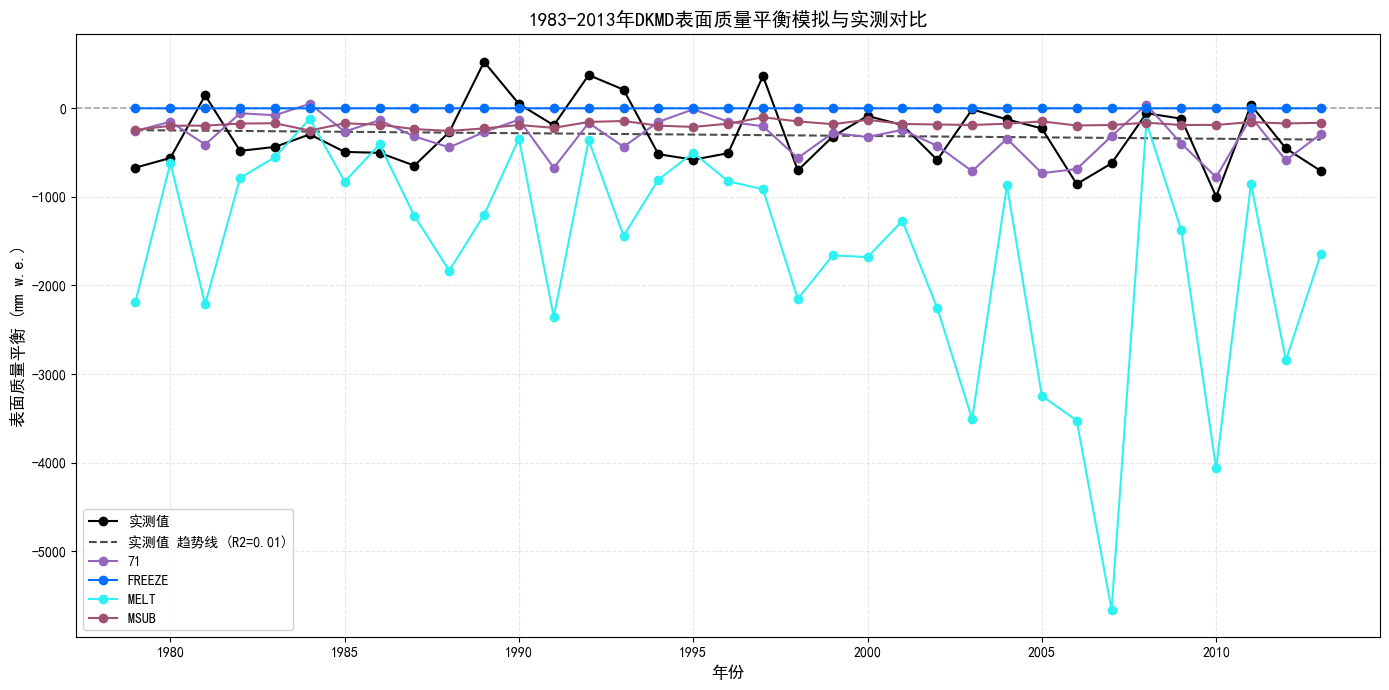

实测冰川 -10482.5
模拟冰川 928167.0533636104

相关系数计算结果:
----------------------------------------------------------------------
变量名        相关系数            R2              RMSE            趋势系数(/年)       
----------------------------------------------------------------------
-0.1528632535289337
y_glc3     -0.1529         0.0234          61837.25        3797.7464      
0.17328758622360171
y_glc4     0.1733          0.0300          388.02          -8.4674        
0.3318315925073841
MELT       0.3318          0.1101          1749.30         -53.0837       
-0.17534015880306705
FREEZE     -0.1753         0.0307          467.36          -0.0002        
0.25341809453193026
MSUB       0.2534          0.0642          370.56          1.3590         
-0.15925442943959867
FGRND      -0.1593         0.0254          1279.34         80.2253        
0.09037843056318746
DLWRF      0.0904          0.0082          1835509.00      2320.0361      


In [42]:
from sklearn.metrics import mean_squared_error
from scipy.stats import linregress
import numpy as np
import matplotlib.pyplot as plt


def rmse(y_true, y_pred):
    """计算均方根误差"""
    return np.sqrt(mean_squared_error(y_true, y_pred))

def plot_with_trendline(x, y, label, color, ax, show_trend=False):
    """绘制数据点和线性趋势线"""
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    trendline = slope * x + intercept
    ax.plot(x, y, marker='o', linestyle='-', label=label, color=color)
    
    if show_trend:
        ax.plot(x, trendline, linestyle='--', color=color, alpha=0.7, 
                label=f'{label} 趋势线 (R2={r_value**2:.2f})')
    
    return slope, r_value**2

# 修复的统计指标文本框函数 - 不使用plot_with_trendline绘图
def add_stats_box(y_true, y_pred, label, color, x_pos, years, ax):
    """添加统计指标文本框，直接计算而不绘图"""
    corr = calculate_pearson_correlation(y_true, y_pred)
    rmse_val = rmse(y_true, y_pred)
    
    # 直接使用linregress计算趋势，避免绘图
    slope, intercept, r_value, p_value, std_err = linregress(years, y_pred)
    r2 = r_value**2
    
    stats_text = f"{label}:\n" \
                 f"R = {corr:.2f}\n" \
                 f"R2 = {r2:.2f}\n" \
                 f"RMSE = {rmse_val:.1f}\n" \
                 f"趋势 = {slope:.2f}/年"
    
    ax.text(x_pos, 0.03, stats_text, transform=ax.transAxes, fontsize=9,
            bbox=dict(facecolor='white', edgecolor=color, alpha=0.8))

# 画图
# 全局配置
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']  # 使用黑体和备选字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示

# 创建图表
fig, ax = plt.subplots(figsize=(14, 7))  # 使用更大的图表尺寸提高可读性

grn_rad = DSWRF[:35] + DLWRF[:35]
years = np.arange(1979, 2014)
# 替换为你的实际数据
y = DKMD_data1[5:]
y_glc2 = smb_refreeze2[5:35]*48
y_glc3 = smb_refreeze83[:35]
y_glc4 = smb_refreeze71[:35]/3 
MELT = -melt[:35] 
FREEZE = refreeze[:35]*48
MSUB = -msub[:35]*48
FGRND = rad[:35] - np.mean(rad[:38])
net_rad = grn_rad -np.mean(grn_rad )
years = years.astype(float)
y = y.astype(float)

# 确保数据长度一致
min_length = min(len(years), len(y), len(y_glc3), len(y_glc4))
print(min_length)
years = years[:min_length]
y = y[:min_length]
y_glc3 = y_glc3[:min_length]
y_glc4 = y_glc4[:min_length]

# 绘制数据和趋势线
plot_with_trendline(years, y, '实测值', '#000000', ax, True)  # 黑色 - 实测基准，显示趋势线
#plot_with_trendline(years, y_glc3, '79', '#2ca02c', ax)  # 植被绿 - GLC3
plot_with_trendline(years, y_glc4, '71', '#9467bd', ax)  # 紫色 - GLC4
#plot_with_trendline(years,(DSWRF[:35]-np.mean(DSWRF))/365 ,'DSWRF', '#ff67bd', ax)  # 紫色 - GLC4
#plot_with_trendline(years,(DLWRF[:35]-np.mean(DLWRF))/365, 'DLWRF ', '#ff6700', ax)  # 紫色 - GLC4
plot_with_trendline(years,FREEZE , 'FREEZE', '#006fff', ax)  # 紫色 - GLC4
plot_with_trendline(years,MELT , 'MELT ', '#30f1f1', ax)  # 紫色 - GLC4
plot_with_trendline(years,MSUB , 'MSUB ', '#a05171', ax)  # 紫色 - GLC4
# 添加水平零线
ax.axhline(y=0, color='gray', linestyle='--', alpha=0.7, linewidth=1.2, zorder=0)

# 设置图表样式
ax.set_xlabel('年份', fontsize=12)
ax.set_ylabel('表面质量平衡 (mm w.e.)', fontsize=12)
ax.set_title("1983-2013年DKMD表面质量平衡模拟与实测对比", fontsize=14, fontweight='bold')
ax.legend(loc='best', frameon=True, framealpha=0.9)
ax.grid(True, linestyle='--', alpha=0.3)

# 设置Y轴范围，确保零线位置合理
#y_min = min(np.min(y), np.min(y_glc3), np.min(y_glc4)) * 1.1
#y_max = max(np.max(y), np.max(y_glc3), np.max(y_glc4)) * 1.1
#ax.set_ylim(y_min, y_max)

# 添加统计信息文本框 - 使用修复后的函数，传递正确参数
#add_stats_box(y, y_glc3, "模型GLC3", "#2ca02c", 0.03, years, ax)
#add_stats_box(y, y_glc4, "模型GLC4", "#9467bd", 0.20, years, ax)
#add_stats_box(y, FREEZE*1000 , "refreeze", "#67bd", 0.20, years, ax)
# 年代背景着色
decades = [(1979, 1989, "1980s"), (1990, 1999, "1990s"), (2000, 2009, "2000s"), (2010, 2013, "2010s")]
for start, end, label in decades:
    if start < years[0]:
        start = years[0]
    if end > years[-1]:
        end = years[-1]
        
    start_idx = np.where(years >= start)[0][0] if start in years else 0
    end_idx = np.where(years <= end)[0][-1] if len(np.where(years <= end)[0]) > 0 else len(years)-1
    
   # if start_idx <= end_idx:
   #     ax.axvspan(years[start_idx], years[end_idx], alpha=0.1, color='gray')
   #     mid_point = start + (end - start)/2
   #     ax.text(mid_point, y_min * 0.95, label, ha='center', fontsize=10, alpha=0.7)

plt.tight_layout()  # 自动调整子图间距,防止标签重叠
plt.show()

# 定义要比较的所有变量及其名称
variables = {
    'y_glc3': y_glc3,
    'y_glc4': y_glc4,
    'MELT': MELT[:min_length],
    'FREEZE': FREEZE[:min_length],
    'MSUB': MSUB[:min_length],
    'FGRND': FGRND[:min_length],
    'DLWRF':DLWRF[:35]
}
print('实测冰川',sum(y))
print('模拟冰川',sum(y_glc3))
# 创建表格式输出
print("\n相关系数计算结果:")
print("-" * 70)
print("{:<10} {:<15} {:<15} {:<15} {:<15}".format("变量名", "相关系数", "R2", "RMSE", "趋势系数(/年)"))
print("-" * 70)

# 计算每个变量与实测值的相关系数和RMSE
for name, var in variables.items():
    corr = calculate_pearson_correlation(y, var)
    r2 = corr**2
    rmse_val = rmse(y, var)
    slope, intercept, r_value, p_value, std_err = linregress(years, var)
    
    print("{:<10} {:<15.4f} {:<15.4f} {:<15.2f} {:<15.4f}".format(
        name, corr, r2, rmse_val, slope))


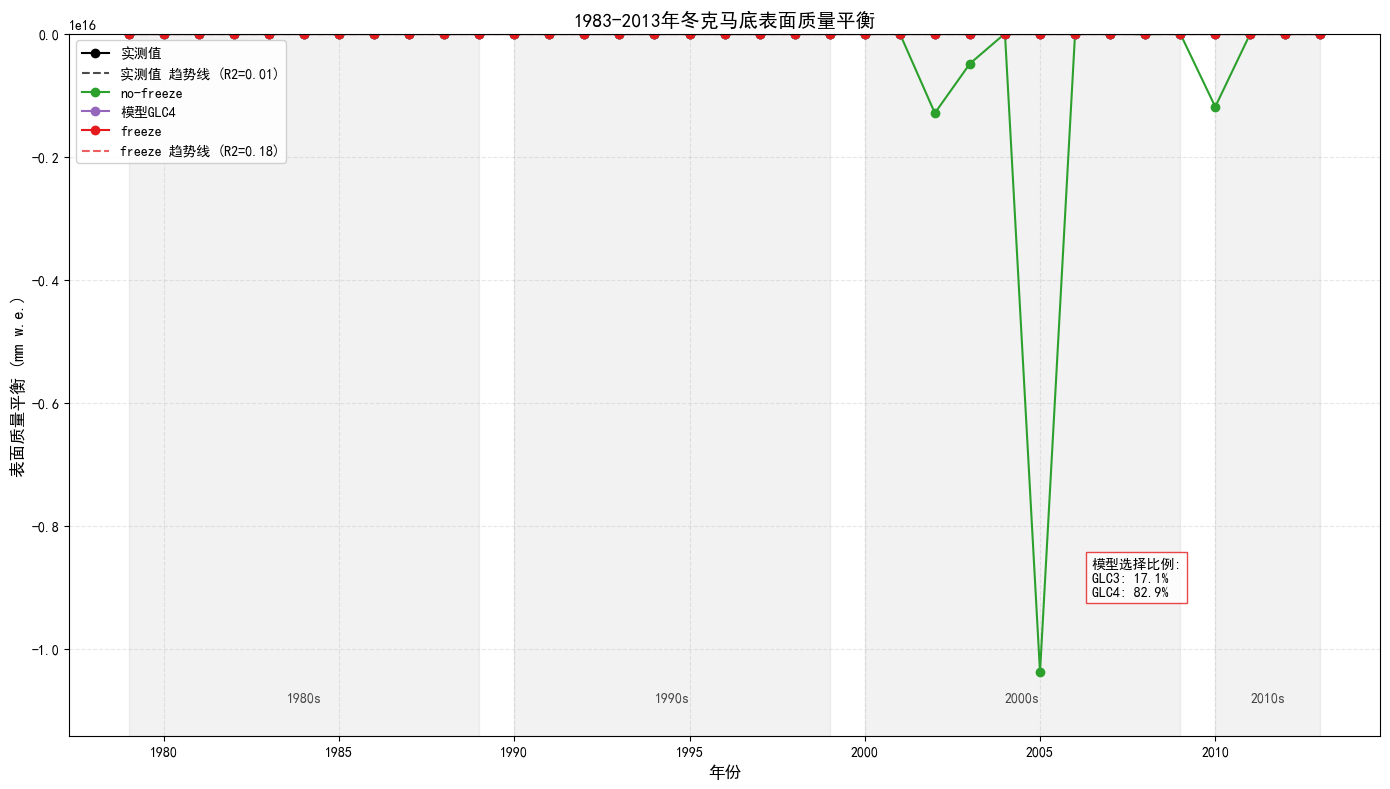


优选组合模型统计:
----------------------------------------------------------------------
GLC3模型贡献: 17.1% (6个点)
GLC4模型贡献: 82.9% (29个点)
----------------------------------------------------------------------
0.6025974434525093
组合模型与实测值相关系数: 0.6026
0.6025974434525093
组合模型R²: 0.3631
组合模型RMSE: 310.52
组合模型趋势系数: -12.9950/年
----------------------------------------------------------------------

模型改进对比:
----------------------------------------------------------------------
模型         相关系数            R²              RMSE           
----------------------------------------------------------------------
0.013711996410083912
0.013711996410083912
GLC3       0.0137          0.0002          1781412489909357.25
0.17328758622360171
0.17328758622360171
GLC4       0.1733          0.0300          388.02         
0.6025974434525093
0.6025974434525093
优选组合       0.6026          0.3631          310.52         
累计值对比: 实测=-10482.5, 优选组合=-7672.9, GLC3=-13365059234090916.0, GLC4=-10957.7
---------------------------------

In [16]:
# 创建最佳拟合组合曲线
def create_best_fit_curve(y_true, curve1, curve2, curve1_name, curve2_name):
    """从两条曲线中为每个时间点选择最接近真实值的点，生成最佳拟合曲线"""
    best_curve = np.zeros_like(y_true)
    selection_mask = np.zeros_like(y_true, dtype=bool)  # True表示选择curve1，False表示选择curve2
    
    for i in range(len(y_true)):
        error1 = abs(curve1[i] - y_true[i])
        error2 = abs(curve2[i] - y_true[i])
        
        if error1 <= error2:
            best_curve[i] = curve1[i]
            selection_mask[i] = True
        else:
            best_curve[i] = curve2[i]
            selection_mask[i] = False
    
    # 计算每个模型贡献的百分比
    curve1_percent = np.sum(selection_mask) / len(selection_mask) * 100
    curve2_percent = 100 - curve1_percent
    
    return best_curve, selection_mask, curve1_percent, curve2_percent

# 创建最佳组合曲线
best_curve, selection_mask, glc3_percent, glc4_percent = create_best_fit_curve(
    y, y_glc3, y_glc4, '模型GLC3', '模型GLC4')

# 创建图表显示组合结果
fig, ax = plt.subplots(figsize=(14, 8))
melt = np.random.randint(30, 60, 35)
# 绘制原始数据和趋势线
plot_with_trendline(years, y, '实测值', '#000000', ax, True)  # 黑色 - 实测值
plot_with_trendline(years, y_glc3, 'no-freeze', '#2ca02c', ax, False)  # 绿色 - GLC3
plot_with_trendline(years, y_glc4, '模型GLC4', '#9467bd', ax, False)  # 紫色 - GLC4

# 绘制最佳组合曲线作为独立的线
best_slope, best_r2 = plot_with_trendline(years, best_curve, 'freeze','#e41a1c', ax, True)  # 红色 - 组合模型

# 添加水平零线和其他图表元素
ax.axhline(y=0, color='gray', linestyle='--', alpha=0.7, linewidth=1.2, zorder=0)

# 设置Y轴范围，确保零线位置合理
y_min = min(np.min(y), np.min(y_glc3), np.min(y_glc4), np.min(best_curve)) * 1.1
y_max = max(np.max(y), np.max(y_glc3), np.max(y_glc4), np.max(best_curve)) * 1.1
ax.set_ylim(y_min, y_max)



# 添加模型选择百分比信息
selection_text = f"模型选择比例:\nGLC3: {glc3_percent:.1f}%\nGLC4: {glc4_percent:.1f}%"
ax.text(0.78, 0.20, selection_text, transform=ax.transAxes, fontsize=10,
       bbox=dict(facecolor='white', edgecolor='#e41a1c', alpha=0.8))

# 设置图表样式
ax.set_xlabel('年份', fontsize=12)
ax.set_ylabel('表面质量平衡 (mm w.e.)', fontsize=12)
ax.set_title("1983-2013年冬克马底表面质量平衡", fontsize=14, fontweight='bold')
ax.legend(loc='upper left', frameon=True, framealpha=0.9)
ax.grid(True, linestyle='--', alpha=0.3)

# 年代背景着色
decades = [(1979, 1989, "1980s"), (1990, 1999, "1990s"), (2000, 2009, "2000s"), (2010, 2013, "2010s")]
for start, end, label in decades:
    if start < years[0]:
        start = years[0]
    if end > years[-1]:
        end = years[-1]
        
    start_idx = np.where(years >= start)[0][0] if start in years else 0
    end_idx = np.where(years <= end)[0][-1] if len(np.where(years <= end)[0]) > 0 else len(years)-1
    
    if start_idx <= end_idx:
        ax.axvspan(years[start_idx], years[end_idx], alpha=0.1, color='gray')
        mid_point = start + (end - start)/2
        ax.text(mid_point, y_min * 0.95, label, ha='center', fontsize=10, alpha=0.7)

plt.tight_layout()
plt.savefig('DKMD_best_combined_model.png', dpi=300, bbox_inches='tight')
plt.show()

# 输出模型组合统计信息
print("\n优选组合模型统计:")
print("-" * 70)
print(f"GLC3模型贡献: {glc3_percent:.1f}% ({int(np.sum(selection_mask))}个点)")
print(f"GLC4模型贡献: {glc4_percent:.1f}% ({len(years) - int(np.sum(selection_mask))}个点)")
print("-" * 70)
print(f"组合模型与实测值相关系数: {calculate_pearson_correlation(y, best_curve):.4f}")
print(f"组合模型R²: {calculate_pearson_correlation(y, best_curve)**2:.4f}")
print(f"组合模型RMSE: {rmse(y, best_curve):.2f}")
print(f"组合模型趋势系数: {best_slope:.4f}/年")
print("-" * 70)

# 原始模型与组合模型改进对比
print("\n模型改进对比:")
print("-" * 70)
print("{:<10} {:<15} {:<15} {:<15}".format("模型", "相关系数", "R²", "RMSE"))
print("-" * 70)
print("{:<10} {:<15.4f} {:<15.4f} {:<15.2f}".format(
    "GLC3", calculate_pearson_correlation(y, y_glc3), 
    calculate_pearson_correlation(y, y_glc3)**2, rmse(y, y_glc3)))
print("{:<10} {:<15.4f} {:<15.4f} {:<15.2f}".format(
    "GLC4", calculate_pearson_correlation(y, y_glc4), 
    calculate_pearson_correlation(y, y_glc4)**2, rmse(y, y_glc4)))
print("{:<10} {:<15.4f} {:<15.4f} {:<15.2f}".format(
    "优选组合", calculate_pearson_correlation(y, best_curve), 
    calculate_pearson_correlation(y, best_curve)**2, rmse(y, best_curve)))
print(f"累计值对比: 实测={sum(y):.1f}, 优选组合={sum(best_curve):.1f}, GLC3={sum(y_glc3):.1f}, GLC4={sum(y_glc4):.1f}")
print("-" * 70)

In [17]:
y_glc3.shape

(35,)

可用中文字体: ['Microsoft YaHei', 'Microsoft JhengHei', 'Microsoft Tai Le', 'Microsoft PhagsPa', 'Microsoft JhengHei', 'Microsoft Sans Serif', 'Microsoft YaHei', 'Microsoft New Tai Lue', 'Microsoft PhagsPa', 'Microsoft JhengHei', 'Microsoft YaHei', 'Microsoft Tai Le', 'Microsoft New Tai Lue', 'Microsoft Himalaya', 'Microsoft Yi Baiti']


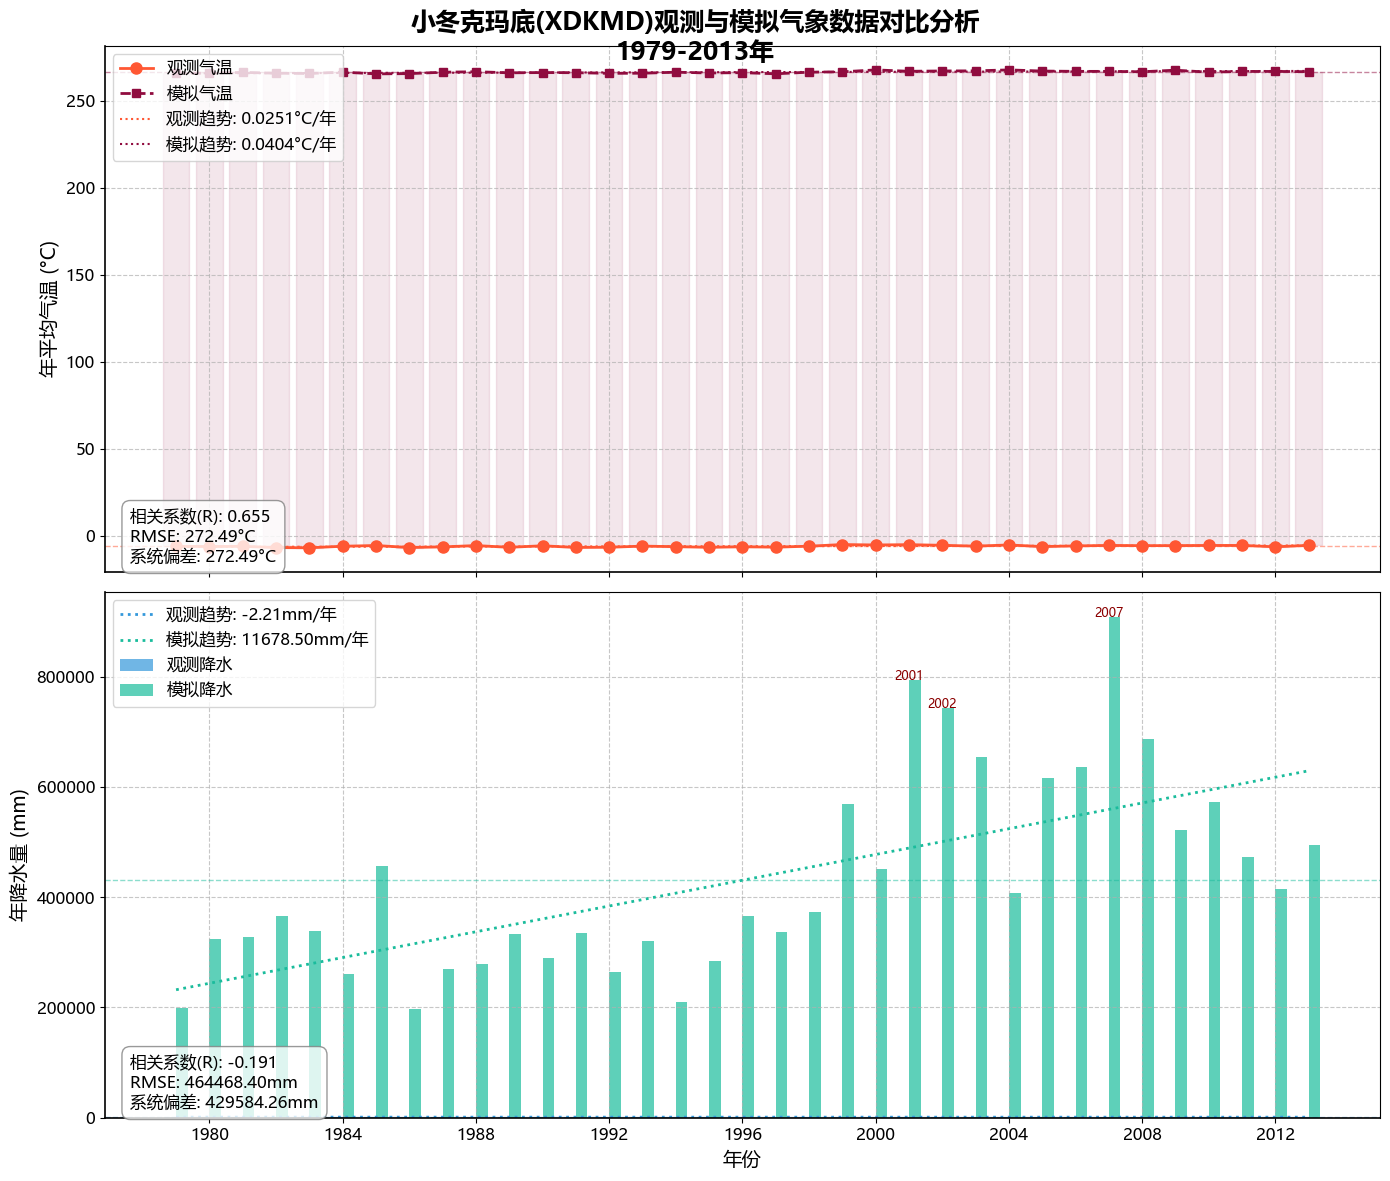


小冬克玛底(XDKMD)气象数据对比分析(1979-2013)
气温对比分析:
--------------------------------------------------------------------------------
  观测均值: -6.00°C    模拟均值: 266.49°C
  观测趋势: 0.0251°C/年    模拟趋势: 0.0404°C/年
  相关系数: 0.6549    p值: 0.0000    RMSE: 272.49°C
  系统偏差: 272.49°C    标准偏差比(模拟/观测): 1.20
  温度矫正系数: -272.49°C (将模拟气温加上此值可减少系统偏差)
--------------------------------------------------------------------------------
降水对比分析:
--------------------------------------------------------------------------------
  观测年降水: 1014.7mm    模拟年降水: 430599.0mm
  观测趋势: -2.21mm/年    模拟趋势: 11678.50mm/年
  相关系数: -0.1908    p值: 0.2723    RMSE: 464468.40mm
  系统偏差: 429584.26mm    标准偏差比(模拟/观测): 1021.07
  降水矫正系数: 0.002 (将模拟降水乘以此系数可减少系统偏差)

降水模拟与观测差异较大的年份:
  2001年: 观测=862.9mm, 模拟=793657.5mm, 差异=792794.6mm (91877.3%)
  2002年: 观测=865.4mm, 模拟=743309.8mm, 差异=742444.4mm (85791.2%)
  2007年: 观测=960.2mm, 模拟=907871.8mm, 差异=906911.6mm (94454.3%)

详细对比数据已保存至 'XDKMD_climate_comparison_1979-2013.csv'


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator
from scipy import stats
import matplotlib as mpl
import matplotlib.font_manager as fm

# 1. 定义read_csv函数，正确处理日序列并转换为年序列
def read_csv(file_path, start_year, end_year):
    """
    读取CSV文件并根据数据类型转换为年平均或年总量
    
    参数:
    file_path: CSV文件路径
    start_year, end_year: 开始和结束年份
    
    返回:
    根据变量类型返回年均值或年总值数组
    """
    try:
        # 读取CSV文件
        df = pd.read_csv(file_path)
        
        # 确定数据类型 (温度还是降水)
        is_temp = 'T2m' in file_path
        
        # 创建年序列数据结构
        years = range(start_year, end_year)
        annual_values = []
        
        # 针对每一年计算年均值或年总值
        for year in years:
            if str(year) in df.columns:
                # 获取该年的所有日数据
                year_data = df[str(year)]
                
                if is_temp:
                    # 对温度数据：计算年均值并转为摄氏度
                    annual_value = (year_data.mean() / 24) 
                else:
                    # 对降水数据：计算年总量
                    annual_value = year_data.sum()*29*29
                    
                annual_values.append(annual_value)
            else:
                # 如果数据中没有该年，填充为NaN
                annual_values.append(np.nan)
                
        return np.array(annual_values)
    
    except Exception as e:
        print(f"读取文件 {file_path} 时出错: {e}")
        # 返回全NaN数组
        return np.full(end_year - start_year, np.nan)

# 2. 设置中文字体
# 查找并设置可用中文字体
zh_fonts = [f.name for f in fm.fontManager.ttflist if '黑' in f.name or 
           '宋' in f.name or '微软' in f.name or 'Microsoft' in f.name]
print("可用中文字体:", zh_fonts)  # 查看系统可用中文字体

if zh_fonts:
    plt.rcParams['font.sans-serif'] = zh_fonts + ['SimHei', 'DejaVu Sans']
else:
    plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'DejaVu Sans', 'Arial Unicode MS']

plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号

# 3. 读取数据
meteo_xdkmd = pd.read_excel(r'D:\Data\青藏高原七条冰川长时间序列物质平衡重构数据集（1975-2013）/XDKMD.xlsx')

# 使用新的read_csv函数读取模拟数据并转换为年序列
T2m_filtered = read_csv(r'D:\CSSP\out_data\DKMD/T2m_forcing_mean_DKMD_corr.csv', 1979, 2014)
APCP_filtered = read_csv(r'D:\CSSP\out_data\DKMD/APCP_forcing_mean_DKMD_corr.csv', 1979, 2014)

# 4. 处理观测数据
meteo_xdkmd = meteo_xdkmd.rename(columns={
    'time': '时间', 
    'air trmperature': '气温', 
    'precipitation/mm': '降水量',
    'net radiation(W/m2)': '净辐射'
})

meteo_xdkmd['时间'] = pd.to_datetime(meteo_xdkmd['时间'])
meteo_xdkmd['年份'] = meteo_xdkmd['时间'].dt.year
meteo_filtered = meteo_xdkmd[meteo_xdkmd['年份'] >= 1979]
annual_means = meteo_filtered.groupby('年份').agg({
    '气温': 'mean',
    '降水量': 'sum',  # 降水通常计算年总和而非均值
    '净辐射': 'mean'
}).reset_index()

# 5. 确保数据对齐
years = np.arange(1979, 2014)  # 限制为1979-2013

# 创建一个映射字典，方便按年份查找数据
temp_by_year = dict(zip(annual_means['年份'], annual_means['气温']))
precip_by_year = dict(zip(annual_means['年份'], annual_means['降水量']))
rad_by_year = dict(zip(annual_means['年份'], annual_means['净辐射']))

# 创建严格对齐的数组
temp_aligned = np.array([temp_by_year.get(year, np.nan) for year in years])
precip_aligned = np.array([precip_by_year.get(year, np.nan) for year in years])
rad_aligned = np.array([rad_by_year.get(year, np.nan) for year in years])

# 6. 创建可视化 - 使用两个子图布局
fig, axes = plt.subplots(2, 1, figsize=(14, 12), sharex=True, dpi=100)

# 6.1 气温对比
ax_temp = axes[0]
# 观测气温 - 使用对齐后的数据
ax_temp.plot(years, temp_aligned, 'o-', color='#FF5733', 
            linewidth=2, markersize=8, label='观测气温')
# 模拟气温
ax_temp.plot(years, T2m_filtered, 's--', color='#900C3F', linewidth=2, 
            markersize=6, label='模拟气温')

# 添加趋势线 - 使用对齐后的数据
valid_mask = ~np.isnan(temp_aligned)  # 排除缺失值
valid_years = years[valid_mask]
valid_temps = temp_aligned[valid_mask]

z_obs_t = np.polyfit(valid_years, valid_temps, 1)
p_obs_t = np.poly1d(z_obs_t)
ax_temp.plot(valid_years, p_obs_t(valid_years), ':', color='#FF5733', linewidth=1.5,
             label=f'观测趋势: {z_obs_t[0]:.4f}°C/年')

# 确保模拟数据中的NaN被正确处理
sim_valid_mask = ~np.isnan(T2m_filtered)
z_sim_t = np.polyfit(years[sim_valid_mask], T2m_filtered[sim_valid_mask], 1)
p_sim_t = np.poly1d(z_sim_t)
ax_temp.plot(years[sim_valid_mask], p_sim_t(years[sim_valid_mask]), ':', 
             color='#900C3F', linewidth=1.5,
             label=f'模拟趋势: {z_sim_t[0]:.4f}°C/年')

# 高亮显示差异区域 - 安全处理，仅在两者都有有效值的地方绘制
common_valid = valid_mask & sim_valid_mask
for i in range(len(years)):
    if common_valid[i]:
        obs_temp = temp_aligned[i]
        sim_temp = T2m_filtered[i]
        year = years[i]
        
        # 如果模拟温度高于观测温度，填充红色区域
        if sim_temp > obs_temp:
            ax_temp.fill_between([year-0.4, year+0.4], [obs_temp, obs_temp], 
                                [sim_temp, sim_temp], color='#900C3F', alpha=0.1)
        # 如果观测温度高于模拟温度，填充橙色区域
        elif sim_temp < obs_temp:
            ax_temp.fill_between([year-0.4, year+0.4], [sim_temp, sim_temp], 
                                [obs_temp, obs_temp], color='#FF5733', alpha=0.1)

ax_temp.set_ylabel('年平均气温 (°C)', fontsize=14)
ax_temp.grid(True, linestyle='--', alpha=0.7)
ax_temp.legend(loc='upper left', fontsize=12)

# 添加相关性信息 - 确保只使用两者都有效的数据点
valid_for_corr = common_valid
corr_t, p_value_t = stats.pearsonr(temp_aligned[valid_for_corr], T2m_filtered[valid_for_corr])
rmse_t = np.sqrt(np.mean((temp_aligned[valid_for_corr] - T2m_filtered[valid_for_corr])**2))
temp_diff = np.mean(T2m_filtered[valid_for_corr] - temp_aligned[valid_for_corr])
ax_temp.text(0.02, 0.02, 
             f'相关系数(R): {corr_t:.3f}\nRMSE: {rmse_t:.2f}°C\n系统偏差: {temp_diff:.2f}°C', 
             transform=ax_temp.transAxes, fontsize=12,
             bbox=dict(facecolor='white', edgecolor='gray', alpha=0.8, boxstyle='round,pad=0.5'))

# 6.2 降水对比
ax_precip = axes[1]
# 使用并排柱状图进行对比
width = 0.35
valid_precip_mask = ~np.isnan(precip_aligned)
sim_precip_valid_mask = ~np.isnan(APCP_filtered)

# 只绘制有效数据点
ax_precip.bar(years[valid_precip_mask] - width/2, precip_aligned[valid_precip_mask], width, 
              color='#3498DB', alpha=0.7, label='观测降水')
ax_precip.bar(years[sim_precip_valid_mask] + width/2, APCP_filtered[sim_precip_valid_mask], width, 
              color='#1ABC9C', alpha=0.7, label='模拟降水')

# 添加趋势线
valid_precip_years = years[valid_precip_mask]
valid_precip = precip_aligned[valid_precip_mask]

z_obs_p = np.polyfit(valid_precip_years, valid_precip, 1)
p_obs_p = np.poly1d(z_obs_p)
ax_precip.plot(valid_precip_years, p_obs_p(valid_precip_years), ':', color='#3498DB', linewidth=2,
               label=f'观测趋势: {z_obs_p[0]:.2f}mm/年')

z_sim_p = np.polyfit(years[sim_precip_valid_mask], APCP_filtered[sim_precip_valid_mask], 1)
p_sim_p = np.poly1d(z_sim_p)
ax_precip.plot(years[sim_precip_valid_mask], p_sim_p(years[sim_precip_valid_mask]), ':', 
               color='#1ABC9C', linewidth=2,
               label=f'模拟趋势: {z_sim_p[0]:.2f}mm/年')

# 相关性分析 - 只用两者都有效的数据点
common_precip_mask = valid_precip_mask & sim_precip_valid_mask
corr_p, p_value_p = stats.pearsonr(precip_aligned[common_precip_mask], 
                                   APCP_filtered[common_precip_mask])
rmse_p = np.sqrt(np.mean((precip_aligned[common_precip_mask] - 
                           APCP_filtered[common_precip_mask])**2))
precip_diff = np.mean(APCP_filtered[common_precip_mask] - precip_aligned[common_precip_mask])

# 突出显示极端年份
extreme_years = []
for i in range(len(years)):
    if common_precip_mask[i]:  # 只处理两者都有观测数据的年份
        year = years[i]
        obs_p = precip_aligned[i]
        sim_p = APCP_filtered[i]
        if abs(obs_p - sim_p) > rmse_p * 1.5:  # 使用1.5倍RMSE作为阈值
            extreme_years.append((year, obs_p, sim_p))
            ax_precip.annotate(f'{int(year)}', (year, max(obs_p, sim_p) + 20), 
                              ha='center', fontsize=9, color='darkred')

ax_precip.set_ylabel('年降水量 (mm)', fontsize=14)
ax_precip.set_xlabel('年份', fontsize=14)
ax_precip.grid(True, linestyle='--', alpha=0.7)
ax_precip.legend(loc='upper left', fontsize=12)

# 添加相关性信息
ax_precip.text(0.02, 0.02, 
               f'相关系数(R): {corr_p:.3f}\nRMSE: {rmse_p:.2f}mm\n系统偏差: {precip_diff:.2f}mm', 
               transform=ax_precip.transAxes, fontsize=12,
               bbox=dict(facecolor='white', edgecolor='gray', alpha=0.8, boxstyle='round,pad=0.5'))

# 设置x轴显示
for ax in axes:
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=12)
    
# 添加多年均值水平线
ax_temp.axhline(y=np.nanmean(temp_aligned), color='#FF5733', linestyle='--', alpha=0.5, linewidth=1,
               label=f'观测均值: {np.nanmean(temp_aligned):.2f}°C')
ax_temp.axhline(y=np.nanmean(T2m_filtered), color='#900C3F', linestyle='--', alpha=0.5, linewidth=1,
               label=f'模拟均值: {np.nanmean(T2m_filtered):.2f}°C')

ax_precip.axhline(y=np.nanmean(precip_aligned), color='#3498DB', linestyle='--', alpha=0.5, linewidth=1,
                 label=f'观测均值: {np.nanmean(precip_aligned):.1f}mm')
ax_precip.axhline(y=np.nanmean(APCP_filtered), color='#1ABC9C', linestyle='--', alpha=0.5, linewidth=1,
                 label=f'模拟均值: {np.nanmean(APCP_filtered):.1f}mm')

# 添加图表边框
for ax in axes:
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.spines['left'].set_linewidth(1.2)
    ax.spines['bottom'].set_linewidth(1.2)

plt.suptitle('小冬克玛底(XDKMD)观测与模拟气象数据对比分析\n1979-2013年', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.savefig('XDKMD_obs_vs_sim_comparison_1979-2013.png', dpi=300, bbox_inches='tight')
plt.show()

# 7. 计算并输出高级统计分析结果
print("\n小冬克玛底(XDKMD)气象数据对比分析(1979-2013)")
print("=" * 80)
print("气温对比分析:")
print("-" * 80)
print(f"  观测均值: {np.nanmean(temp_aligned):.2f}°C    模拟均值: {np.nanmean(T2m_filtered):.2f}°C")
print(f"  观测趋势: {z_obs_t[0]:.4f}°C/年    模拟趋势: {z_sim_t[0]:.4f}°C/年")
print(f"  相关系数: {corr_t:.4f}    p值: {p_value_t:.4f}    RMSE: {rmse_t:.2f}°C")
print(f"  系统偏差: {temp_diff:.2f}°C    标准偏差比(模拟/观测): {np.std(T2m_filtered[common_valid])/np.std(temp_aligned[common_valid]):.2f}")

# 计算矫正因子(偏差校正)
temp_correction = np.nanmean(temp_aligned) - np.nanmean(T2m_filtered)
print(f"  温度矫正系数: {temp_correction:.2f}°C (将模拟气温加上此值可减少系统偏差)")

print("-" * 80)
print("降水对比分析:")
print("-" * 80)
print(f"  观测年降水: {np.nanmean(precip_aligned):.1f}mm    模拟年降水: {np.nanmean(APCP_filtered):.1f}mm")
print(f"  观测趋势: {z_obs_p[0]:.2f}mm/年    模拟趋势: {z_sim_p[0]:.2f}mm/年")
print(f"  相关系数: {corr_p:.4f}    p值: {p_value_p:.4f}    RMSE: {rmse_p:.2f}mm")
print(f"  系统偏差: {precip_diff:.2f}mm    标准偏差比(模拟/观测): {np.std(APCP_filtered[common_precip_mask])/np.std(precip_aligned[common_precip_mask]):.2f}")

# 计算降水矫正因子
precip_scaling = np.nanmean(precip_aligned) / np.nanmean(APCP_filtered)
print(f"  降水矫正系数: {precip_scaling:.3f} (将模拟降水乘以此系数可减少系统偏差)")

# 极端差异年份
if extreme_years:
    print("\n降水模拟与观测差异较大的年份:")
    for year, obs, sim in extreme_years:
        print(f"  {int(year)}年: 观测={obs:.1f}mm, 模拟={sim:.1f}mm, 差异={(sim-obs):.1f}mm ({((sim-obs)/obs)*100:.1f}%)")
else:
    print("\n未发现降水模拟与观测差异特别显著的年份")

print("=" * 80)

# 8. 创建并保存更全面的对比数据表
comparison_df = pd.DataFrame({
    '年份': years,
    '观测气温(°C)': temp_aligned,
    '模拟气温(°C)': T2m_filtered,
    '气温差异(模拟-观测)': T2m_filtered - temp_aligned,
    '气温差异百分比(%)': ((T2m_filtered - temp_aligned) / np.abs(temp_aligned)) * 100,
    '观测降水(mm)': precip_aligned,
    '模拟降水(mm)': APCP_filtered,
    '降水差异(mm)': APCP_filtered - precip_aligned,
    '降水差异百分比(%)': ((APCP_filtered - precip_aligned) / precip_aligned) * 100
})

# 添加净辐射
comparison_df['观测净辐射(W/m²)'] = rad_aligned

# 处理百分比列中的无穷大值（当观测值为0时）
comparison_df = comparison_df.replace([np.inf, -np.inf], np.nan)

comparison_df.to_csv('XDKMD_climate_comparison_1979-2013.csv', index=False, encoding='utf-8-sig')
print("\n详细对比数据已保存至 'XDKMD_climate_comparison_1979-2013.csv'")

In [19]:
print(calculate_pearson_correlation(T2m_filtered, y))

-0.03557687570444874
-0.03557687570444874


In [20]:
DKMD_data1.shape

(43,)

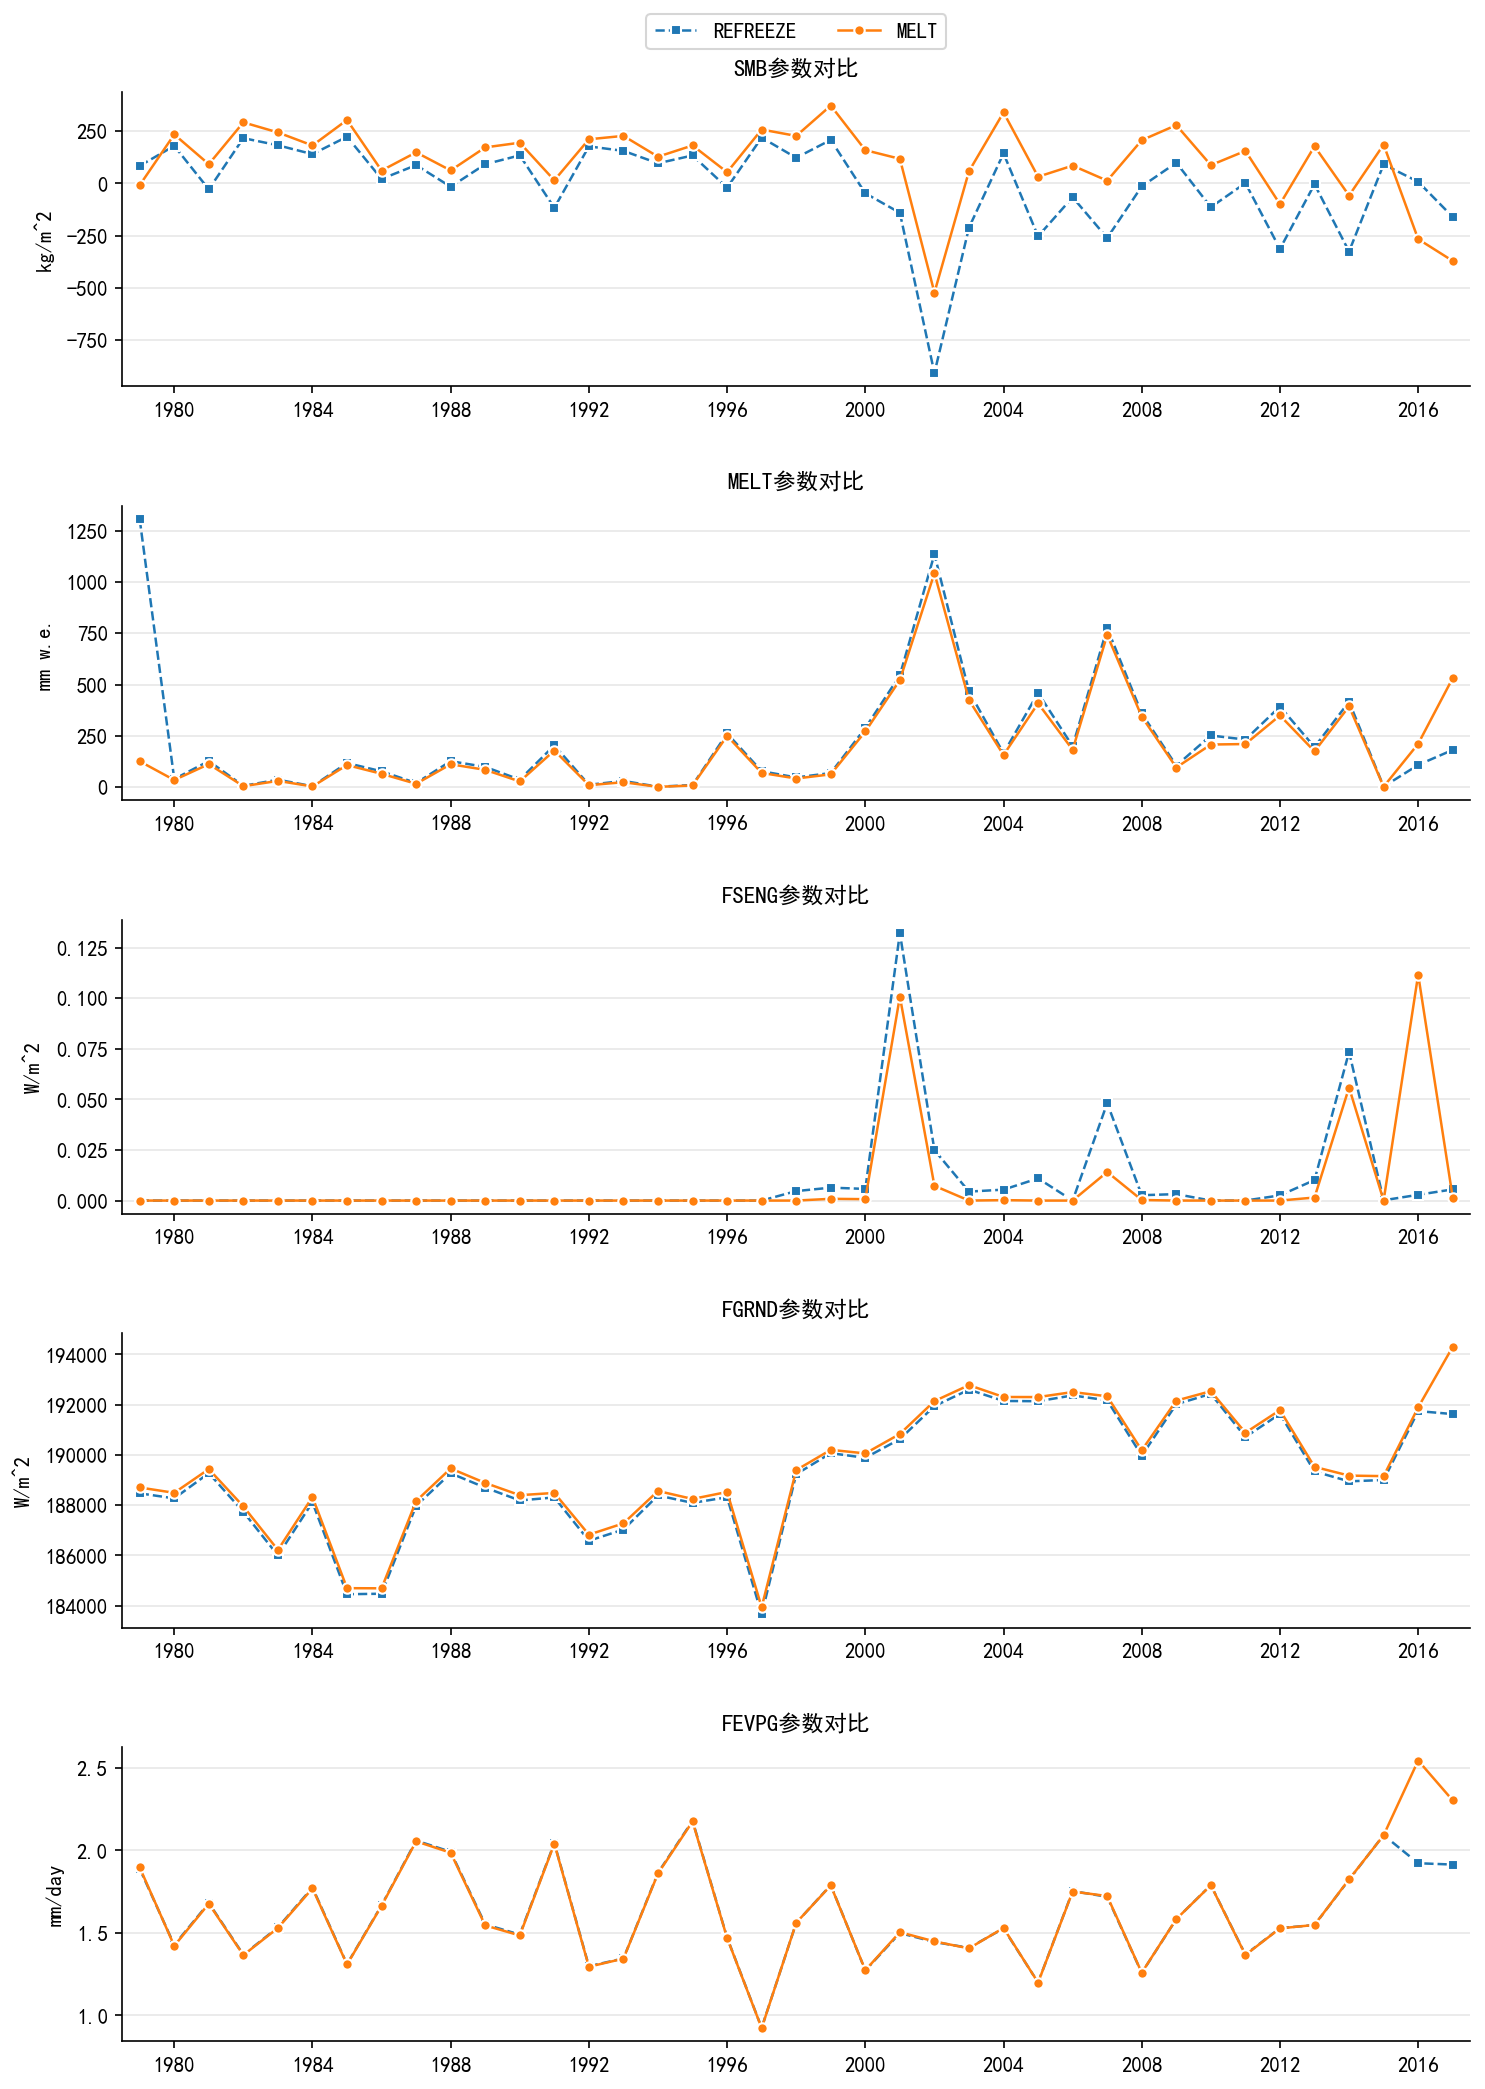

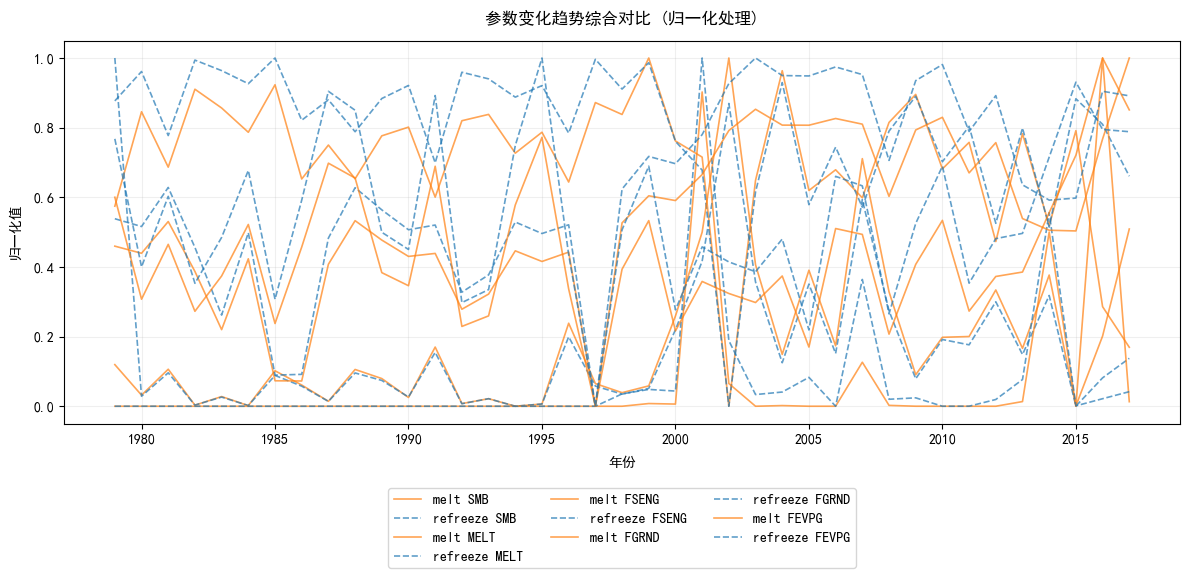

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
# 设置全局字体为中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
# 解决负号显示问题
plt.rcParams['axes.unicode_minus'] = False
# ========================
# 数据准备与预处理
# ========================

# 定义核心参数
COLORS = {'refreeze': '#1f77b4', 'melt': '#ff7f0e'}  # 标准蓝 vs 警示橙
LINE_STYLES = {'refreeze': '--', 'melt': '-'}        # 虚线 vs 实线
MARKERS = {'refreeze': 's', 'melt': 'o'}             # 方框 vs 圆点

# 创建结构化数据存储
data = {
    'SMB': {
        'refreeze': read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v2.1.csv', 1979, 2017),
        'melt': read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_SMB_DKMD_v2.0.csv', 1979, 2017)
    },
    'MELT': {
        'refreeze': read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v2.1.csv', 1979, 2017),
        'melt': read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_MELT_GLACIER_DKMD_v2.0.csv', 1979, 2017)
    },
    'FSENG': {
        'refreeze': read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v2.1.csv', 1979, 2017),
        'melt': read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FSENG_GLACIER_DKMD_v2.0.csv', 1979, 2017)
    },
    'FGRND': {
        'refreeze': read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FGRND_GLACIER_DKMD_v2.1.csv', 1979, 2017),
        'melt': read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FGRND_GLACIER_DKMD_v2.0.csv', 1979, 2017)
    },
    'FEVPG': {
        'refreeze': read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FEVPG_GLACIER_DKMD_v2.1.csv', 1979, 2017),
        'melt': read_csv_and_sum(r'D:\CSSP\out_data\DKMD\CSSPsurface_FEVPG_GLACIER_DKMD_v2.0.csv', 1979, 2017)
    }
}

# 生成时间序列
years = np.arange(1979, 2018)  # 包含2017年

# ========================
# 可视化函数定义
# ========================
def plot_dual_comparison(ax, param, unit):
    """双模式对比绘图函数"""
    for mode in ['refreeze', 'melt']:
        ax.plot(years, data[param][mode],
                linestyle=LINE_STYLES[mode],
                marker=MARKERS[mode],
                color=COLORS[mode],
                markeredgecolor='w',
                linewidth=1.2,
                markersize=5,
                label=f'{mode.upper()}')

    # 坐标轴优化
    ax.xaxis.set_major_locator(MaxNLocator(nbins=10, integer=True))
    ax.set_xlim(1978.5, 2017.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(axis='y', alpha=0.3)
    
    # 图例与标签
    ax.set_title(f'{param}参数对比', fontsize=11, pad=8)
    ax.set_ylabel(unit, labelpad=6)

# ========================
# 生成五参数对比图
# ========================
fig, axs = plt.subplots(5, 1, figsize=(10, 14), dpi=150)

params = [
    ('SMB', 'kg/m^2'),  # 使用 ^2 代替 ²
    ('MELT', 'mm w.e.'),
    ('FSENG', 'W/m^2'),  # 同样修改这里
    ('FGRND', 'W/m^2'),  # 也修改这里
    ('FEVPG', 'mm/day')
]

for idx, (param, unit) in enumerate(params):
    ax = axs[idx]
    plot_dual_comparison(ax, param, unit)
    
    # 仅在第一个子图添加图例
    if idx == 0:
        ax.legend(ncol=2, loc='upper center', 
                 bbox_to_anchor=(0.5, 1.3),
                 frameon=True,
                 edgecolor='0.8')

plt.tight_layout(h_pad=2.5)
plt.savefig('Parameter_Comparison.png', bbox_inches='tight')

# ========================
# 综合趋势对比图
# ========================
fig_sum, ax_sum = plt.subplots(figsize=(12, 6))

# 标准化处理函数
def normalize(series):
    return (series - np.min(series)) / (np.max(series) - np.min(series))

# 绘制趋势线
for param, _ in params:
    ax_sum.plot(years, normalize(data[param]['melt']), 
               color=COLORS['melt'], alpha=0.7, lw=1.2,
               label=f'melt {param}')
    
    ax_sum.plot(years, normalize(data[param]['refreeze']),
               color=COLORS['refreeze'], alpha=0.7, lw=1.2, 
               linestyle='--',
               label=f'refreeze {param}')

# 可视化优化
ax_sum.set_title('参数变化趋势综合对比 (归一化处理)', fontsize=12, pad=12)
ax_sum.set_xlabel('年份', labelpad=8)
ax_sum.set_ylabel('归一化值', labelpad=8)
ax_sum.xaxis.set_major_locator(MaxNLocator(nbins=10, integer=True))
ax_sum.grid(alpha=0.2)

# 精简图例
handles, labels = ax_sum.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax_sum.legend(unique_labels.values(), unique_labels.keys(),
             ncol=3, loc='upper center',
             bbox_to_anchor=(0.5, -0.15))

plt.tight_layout()
plt.savefig('Trend_Summary.png', dpi=300, bbox_inches='tight')

plt.show()


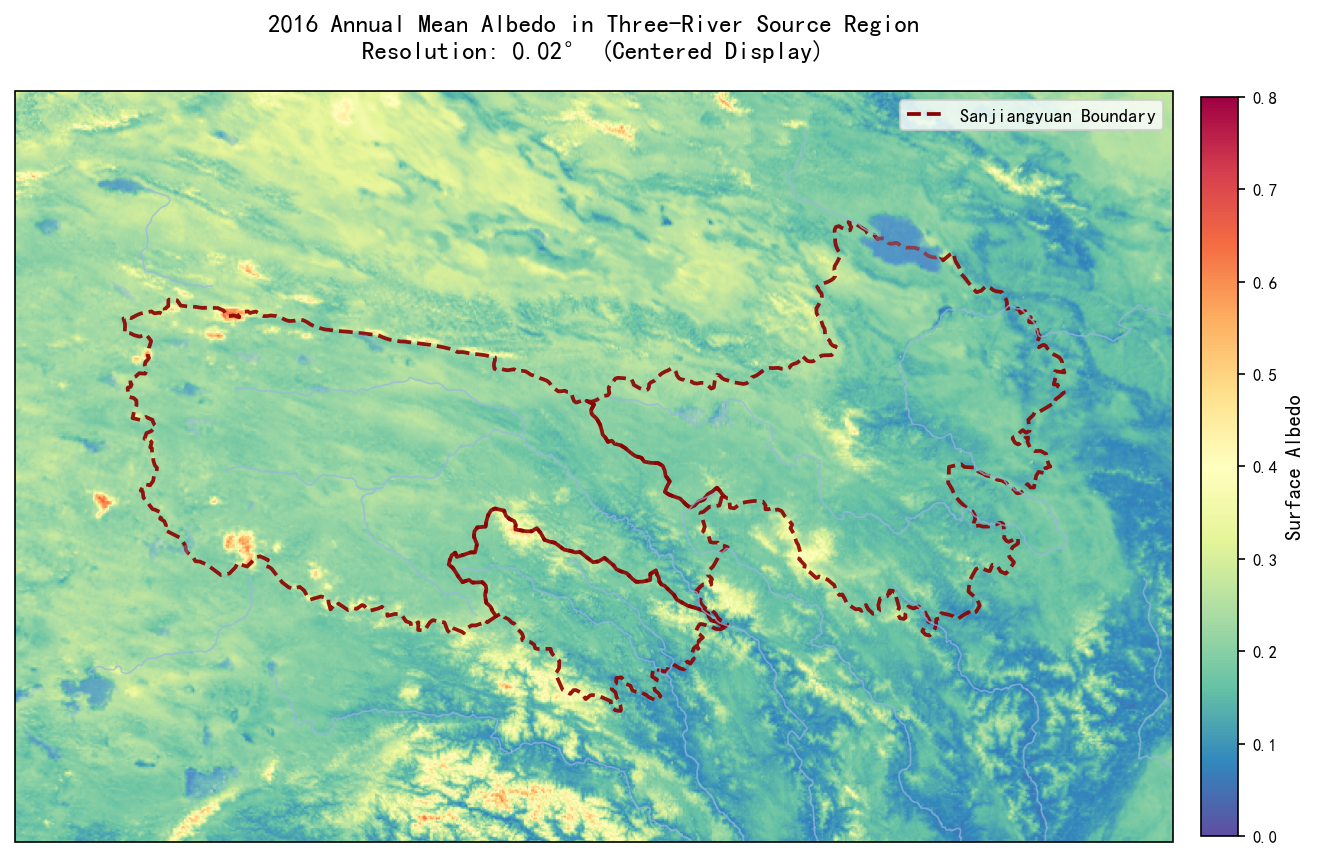

In [22]:
import geopandas as gpd
import pandas as pd
import numpy as np
import rasterio
from rasterio.mask import mask
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.interpolate import griddata

# 配置参数
SHP_PATH = r"D:\download\下载 (26)\三江源区范围数据集（2018）\The Boundary_Drainage_Basin of Sanjiangyuan\Drainage_Basin.shp"
CSV_PATH = r'D:/code/code/python/tibet_albedo_2016_avg.csv'
OUTPUT_IMG = 'sanjiang_albedo_centered.png'

# 地理参数
RES = 0.02  # 分辨率
CMAP = 'Spectral_r'
VMIN, VMAX = 0, 0.8

def load_data():
    """加载并预处理数据"""
    # 读取矢量数据
    sanjiang = gpd.read_file(SHP_PATH)
    if sanjiang.crs != 'EPSG:4326':
        sanjiang = sanjiang.to_crs('EPSG:4326')
    
    # 读取CSV数据
    df = pd.read_csv(CSV_PATH)
    return sanjiang, df[['Longitude', 'Latitude', 'Albedo_Avg']].values

def calculate_bounds(geodf, buffer=1.5):
    """计算带缓冲区的边界范围"""
    xmin, ymin, xmax, ymax = geodf.total_bounds
    return [
        xmin - buffer,  # west
        xmax + buffer,  # east
        ymin - buffer,  # south
        ymax + buffer   # north
    ]

def generate_grid(bounds, res=0.02):
    """生成插值网格"""
    x = np.linspace(bounds[0], bounds[1], int((bounds[1]-bounds[0])/res)+1)
    y = np.linspace(bounds[3], bounds[2], int((bounds[3]-bounds[2])/res)+1)  # 纬度降序
    return np.meshgrid(x, y)

def plot_region(ax, data, grid, bounds, sanjiang):
    """专业级区域绘图"""
    # 绘制反照率
    img = ax.imshow(
        data,
        extent=bounds,
        origin='upper',
        cmap=CMAP,
        vmin=VMIN,
        vmax=VMAX,
        transform=ccrs.PlateCarree()
    )
    
    # 添加矢量边界
    sanjiang.plot(
        ax=ax,
        facecolor='none',
        edgecolor='darkred',
        linewidth=1.8,
        linestyle='--',
        alpha=0.9
    )
    
    # 添加地理要素
    ax.add_feature(cfeature.RIVERS.with_scale('10m'), linewidth=0.8, alpha=0.7)
    ax.add_feature(cfeature.LAKES.with_scale('10m'), alpha=0.3)
    
    # 添加比例尺

    return img

# 主程序
sanjiang, albedo_data = load_data()
bounds = calculate_bounds(sanjiang)
xx, yy = generate_grid(bounds, RES)

# 插值计算
grid_albedo = griddata(
    (albedo_data[:,0], albedo_data[:,1]),
    albedo_data[:,2],
    (xx, yy),
    method='linear',
    fill_value=np.nan
)

# 可视化设置
plt.figure(figsize=(12, 8), dpi=150)
ax = plt.axes(projection=ccrs.PlateCarree())

# 设置显示范围
ax.set_extent(bounds, crs=ccrs.PlateCarree())

# 绘制主图
img = plot_region(ax, grid_albedo, (xx, yy), bounds, sanjiang)

# 添加颜色条
cbar = plt.colorbar(img, ax=ax, shrink=0.8, pad=0.02)
cbar.set_label('Surface Albedo', fontsize=10)
cbar.ax.tick_params(labelsize=8)

# 添加图例
legend_elements = [
    plt.Line2D([0], [0], color='darkred', ls='--', lw=1.8, 
               label='Sanjiangyuan Boundary')
]
ax.legend(handles=legend_elements, loc='upper right', fontsize=9)

# 标题设置
plt.title('2016 Annual Mean Albedo in Three-River Source Region\n' 
          f'Resolution: {RES}° (Centered Display)',
          fontsize=12, pad=15)

# 保存输出
plt.savefig(OUTPUT_IMG, bbox_inches='tight', dpi=300)
plt.show()


In [23]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

# 设置期刊规范参数
rcParams['font.family'] = 'DejaVu Sans'
rcParams['pdf.fonttype'] = 42
rcParams['axes.linewidth'] = 0.8
rcParams['xtick.major.width'] = 0.8
rcParams['ytick.major.width'] = 0.8

# 读取数据（根据实际变量名调整）
ds1 = xr.open_dataset(
    r'D:/Data/SJY_GLACIER/Grided mass change/dh_swr_0.1deg_1970s-2000_v2.nc'
)
ds2 = xr.open_dataset(
    r'D:/CSSP/out_data/GLOBAL/CSSPsurface_SMB_GLOBAL1981_1981_glc_cropped_downscaled.nc'
)

# 提取目标变量（根据实际变量名修改）
# 假设第一个文件变量名为'dhdt'（单位：m/yr）
mb1 = ds1['mb']
# 假设第二个文件变量名为'SMB'（单位：mm w.e. /yr）
mb2 = ds2['mb']

# 处理时间维度（示例：取1981年数据）
# 第一个文件时间切片（假设时间维度为'time'）
time1 = ds1.time.values.astype('datetime64[Y]')
target_year = np.datetime64('1981')
mb1_selected = mb1.sel(time=target_year)

# 第二个文件假设为单年数据（1981年）
mb2_selected = mb2

# 空间对齐（将第二个数据集重采样到第一个的网格）
mb2_aligned = mb2_selected.interp(
    lat=mb1_selected.lat,
    lon=mb1_selected.lon,
    method='nearest'
)

# 单位统一（假设dhdt转为mm w.e.）
mb1_mm = mb1_selected * 1000  # 1m = 1000mm

# 一维化处理
mb1_flat = mb1_mm.values.flatten()
mb2_flat = mb2_aligned.values.flatten()

# 去除无效值
valid_mask = ~np.isnan(mb1_flat) & ~np.isnan(mb2_flat)
x = mb1_flat[valid_mask]
y = mb2_flat[valid_mask]

# 创建图形
fig, ax = plt.subplots(figsize=(4.5, 4.5))
ax.set_facecolor('none')

# 散点图编码
scatter = ax.scatter(
    x,
    y,
    c='#0173B2',          # 色盲友好蓝色
    alpha=0.6,
    edgecolor='white',
    s=12,                 # 标记大小
    linewidth=0.5,
    zorder=3
)

# 绘制1:1参考线
lim_min = min(ax.get_xlim()[0], ax.get_ylim()[0])
lim_max = max(ax.get_xlim()[1], ax.get_ylim()[1])
ax.plot([lim_min, lim_max], [lim_min, lim_max],
        color='#D55E00',
        linestyle='--',
        linewidth=0.8,
        label='1:1 Line')

# 视觉优化
ax.set_xlabel('Measured Mass Balance (mm w.e./yr)', fontsize=8)
ax.set_ylabel('Simulated SMB (mm w.e./yr)', fontsize=8)
ax.set_aspect('equal', adjustable='datalim')
ax.tick_params(axis='both', which='major', labelsize=7, direction='out')
ax.grid(True, linestyle=':', alpha=0.3, zorder=0)

# 统计标注
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
ax.text(0.05, 0.9, 
        f"R²={r_value**2:.2f}\nSlope={slope:.2f}",
        transform=ax.transAxes,
        fontsize=6,
        bbox=dict(facecolor='white', alpha=0.9, edgecolor='none'))

# 图例与导出
ax.legend(
    frameon=False,
    fontsize=6,
    handlelength=1.5,
    handletextpad=0.5
)
plt.savefig('mb_comparison.pdf',
            dpi=600,
            format='pdf',
            transparent=True,
            bbox_inches='tight',
            pad_inches=0.03)



ValueError: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'h5netcdf', 'scipy']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
https://docs.xarray.dev/en/stable/user-guide/io.html

In [ ]:
fsna = pd.read_csv('D:\CSSP\out_data\DKMD/CSSPsurface_FSENA_DKMDv20.csv')
lfevpa = pd.read_csv('D:\CSSP\out_data\DKMD/CSSPsurface_LFEVPA_DKMDv20.csv')
fgrnd = pd.read_csv('D:\CSSP\out_data\DKMD/CSSPsurface_FGRND_DKMDv20.csv')
sum = fsna + lfevpa + fgrnd
fgrnd_ave = np.mean(fgrnd,axis=1)
lfevpa_ave = np.mean(lfevpa,axis=1)
fsna_ave = np.mean(fsna,axis=1)


NameError: name 'DKMD_SMB20' is not defined

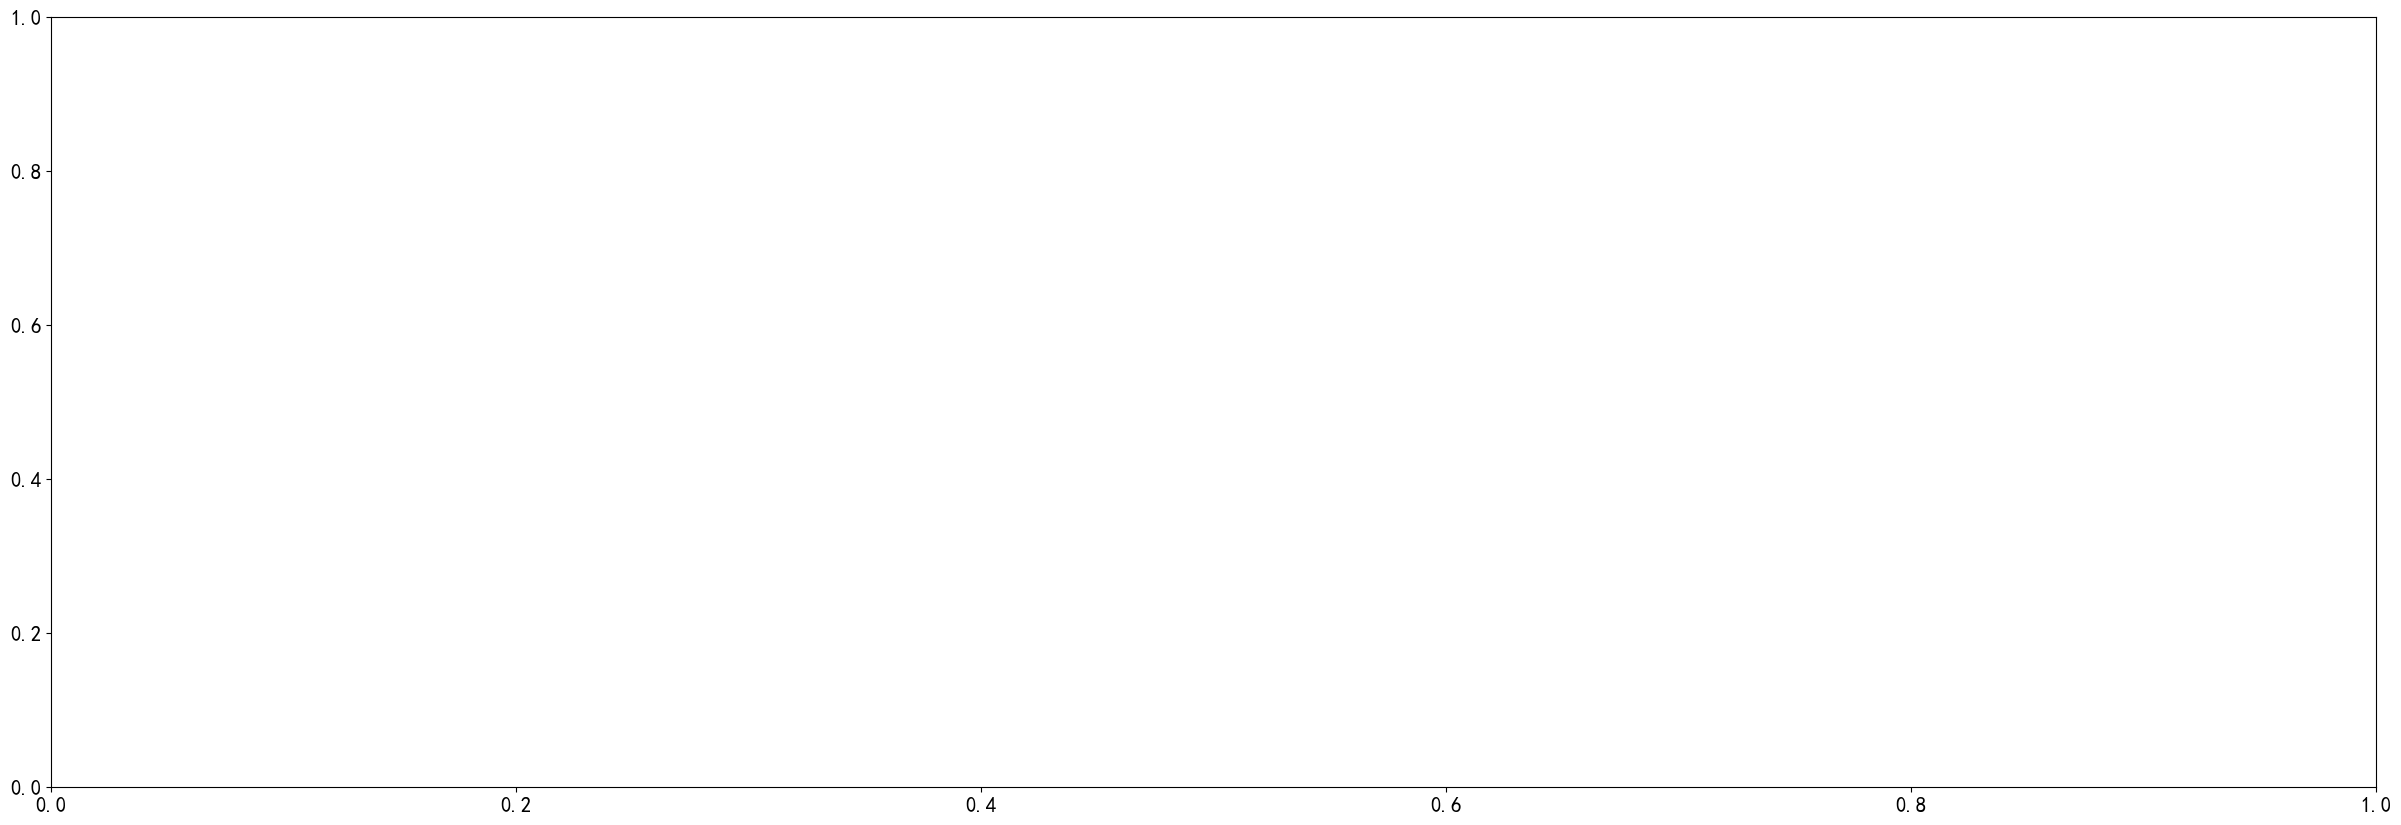

In [ ]:
# 画图  
#  设置画图字体的大小
plt.rcParams.update({'font.size': 15})
#  解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['SimHei']
#  解决负号乱码问题
plt.rcParams['axes.unicode_minus'] = False
fig = plt.figure(figsize=(30, 10))

ax = fig.add_subplot(111)
obs = observedDataArray[:]
y =  DKMD_data1[10:39]
y_glc1 =modelDataArraysmb_cosipyDKMD[5:34]*1000
#y_glc1 =DKMD_SMB4_snow[5:35]
y_glc2 = - DKMD_SMB20[5:34]*50 +4950 #+ 5780
#y_glc2= modelDataArrayglc2
#y_gldd = modelDataArrayGLDD
#ysmb = moderDataArraysmb13
zero = np.zeros(365)
#ysmb = DKMD_data1[:30]
#modelDataArraysmb_DKMD52[21:35] = modelDataArraysmb_DKMD52[21:35] +000
#ysmb1 = modelDataArraysmb_DKMD67_msub[5:35]#
#ysmb2 = modelDataArraysmb_DKMD67_smelt[5:35]
#ysmb1 = modelDataArraysmb_DKMD53[5:35]+1200
#ysmb2 = modelDataArraysmb_cosipyDKMD[6:36]*1000
#ysmb2 = 
#ysmb2 = (prep_TPHirpr[5:35])
#ysmb2 = modelDataArraysmb_DKMD57[5:35]#+ modelDataArraysmb_DKMD571[5:35]
ax.plot( fgrnd.iloc[:365,2], 'k-', label='净辐射') 
ax.plot(lfevpa.iloc[:365,2], 'b--', label='潜热通量')
ax.plot(fsna.iloc[:365, 2],'r-', label='感热通量')
ax.plot(zero,'k--', label='感热通量')
#ax.plot(ysmb2, 'b--', label='模拟2')


ax.set_xlabel('day')  
ax.set_ylabel('净辐射')
#ax.set_yticks(np.arange(0,400,50))
ax.set_xticks(np.arange(0, 366, 30))
#1983','1984','1985','1986','1987','1988''1988','1989','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002',
#'2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013'])

#,'2014','2015','2016','2017']) ['1979','1980','1981','1982','1983',
ax.set_title("逐日平均能量通量模拟")
ax.legend(['净辐射','潜热通量','感热通量'],loc='upper left')





plt.show()
calculate_pearson_correlation(list(y),list(y_glc2))
rmse(y,y_glc2)

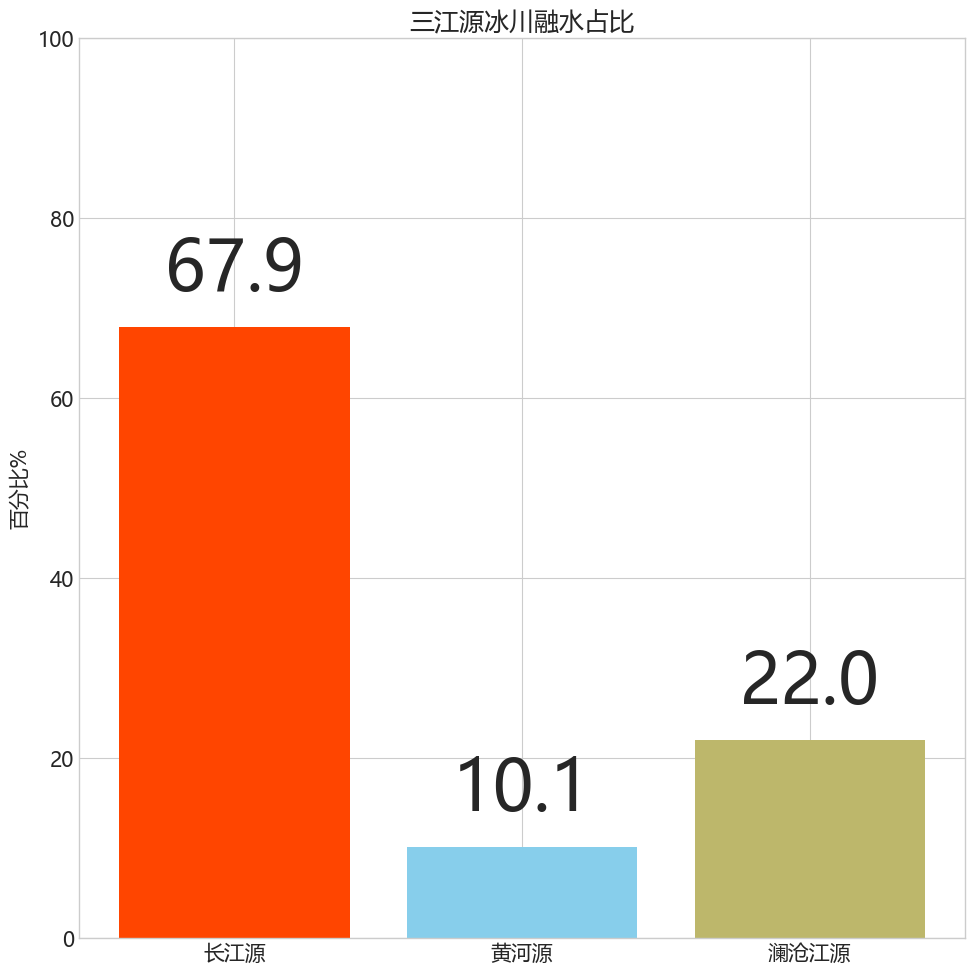

In [ ]:
import matplotlib.pyplot as plt
fgrnd_sum = np.sum(fgrnd_ave)
lfevpa_sum = np.sum(lfevpa_ave)
fsna_sum = np.sum(fsna_ave)    
sum =fgrnd_sum+ lfevpa_sum
frc1 = [67.9, 10.1, 22.0]
categories = ['长江源', '黄河源', '澜沧江源']
values = [25, 40, 15]
colors = ['orangered', 'skyblue', 'darkkhaki'] # More descriptive colors


plt.figure(figsize=(10, 10)) # 设置图形大小,使标注更清晰

plt.bar(categories, frc1, color=colors)

plt.ylabel("百分比%")
plt.title("三江源冰川融水占比")
plt.ylim(0, 100)  # 设置 y 轴范围从 0 到 100
# 使用更灵活的标注方式,避免数字重叠
for i, v in enumerate(frc1):
    plt.text(i, v + 2, str(v), ha='center', va='bottom', fontsize=50) # va='bottom' 将数字放在柱子顶部

plt.tight_layout() # 自动调整子图参数,防止标签重叠
plt.show()



In [ ]:
frc1

[67.9, 11.1, 22.0]

In [ ]:
net_rad = read_csv('D:/CSSP/out_data/DKMD/CSSPsurface_SMB_DKMDv17.csv',2008,2009)
obs = net_rad[:365]
model = net_rad[366:731]

In [ ]:
net_rad = pd.read_csv('D:/CSSP/out_data/DKMD/CSSPsurface_SMB_DKMDv17.csv')
net_rad

,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,-94.036324,0.593250,-0.010790,-0.027457,0.005214,-0.022548,0.027678,0.007672,-0.001723,-0.025131,...,-43.868073,-52.405334,-59.218811,-6.655402,-34.376385,7.940817,5.426138,-8.667729,-2.776012,-4.271864
1,-14.684470,-20.868357,-0.003603,-0.009171,0.004109,-0.230996,-0.009276,0.004768,0.006249,-0.049430,...,12.949763,-37.549915,-54.595657,-3.214306,-6.334463,-20.500315,0.563097,-10.841519,9.413139,4.435590
2,-19.699417,-13.980351,0.003417,-0.003664,0.001748,0.000569,0.010532,0.002511,-0.002157,-0.009351,...,3.241603,-37.524044,-52.237396,4.644343,-6.036331,-1.470137,-22.114027,-12.108692,7.949822,-37.864819
3,-1.344289,2.076349,0.018953,-0.002541,0.010395,0.001663,0.009054,0.004886,-0.014516,-0.004993,...,-6.309648,-31.463114,-32.314648,-18.354460,2.729581,-11.984947,-6.763685,6.991207,-22.024202,0.693185
4,-58.299541,-43.472729,0.011347,-0.011147,0.009783,-0.020137,0.021738,0.000486,-0.016245,-0.029351,...,-2.078696,-77.821236,-37.653297,-7.266470,-3.620651,0.534305,-7.348029,-20.216709,-21.030432,13.551830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,-0.640612,-0.000744,-0.003523,-0.017124,0.006417,-0.026743,0.011997,-0.007119,-0.030010,0.009576,...,-75.131432,-55.152714,1.421251,-9.497925,-10.497577,10.995296,-10.311923,-21.727081,0.671943,-67.079361
362,-1.352105,0.000304,-0.000526,0.009825,-0.014671,-0.005890,0.008559,0.002874,-0.010655,-0.007492,...,-71.108742,-48.236851,-14.256574,3.739379,-1.425766,4.669516,-20.237413,-1.192725,-4.089501,-32.785374
363,-0.840232,-0.024724,-0.007744,0.044963,0.003148,-0.009350,0.015517,0.010450,-0.001174,0.004960,...,-66.805763,-58.521515,3.506964,-4.242478,-9.547387,-6.300565,-5.559412,-0.888805,6.428408,-72.021942
364,-27.486338,-0.003076,-0.004885,0.005543,-0.012946,0.004543,0.007600,0.000473,-0.011554,-0.015841,...,-57.113003,-39.939907,-0.352519,2.006512,-6.083931,-7.056628,-1.043721,2.435865,-12.703055,-37.310474


In [ ]:
top, bottom, left, right = 34.17051, 41.046257,109.50937, 115.55054 
target_shape = [77,121]  # 插值数组的shape
target_x = np.linspace( left, right, target_shape[1])
target_y = np.linspace( top , bottom, target_shape[0])  # 目标数组的行索引
print(target_x)

[109.50937    109.55971308 109.61005617 109.66039925 109.71074233
 109.76108542 109.8114285  109.86177158 109.91211467 109.96245775
 110.01280083 110.06314392 110.113487   110.16383008 110.21417317
 110.26451625 110.31485933 110.36520242 110.4155455  110.46588858
 110.51623167 110.56657475 110.61691783 110.66726092 110.717604
 110.76794708 110.81829017 110.86863325 110.91897633 110.96931942
 111.0196625  111.07000558 111.12034867 111.17069175 111.22103483
 111.27137792 111.321721   111.37206408 111.42240717 111.47275025
 111.52309333 111.57343642 111.6237795  111.67412258 111.72446567
 111.77480875 111.82515183 111.87549492 111.925838   111.97618108
 112.02652417 112.07686725 112.12721033 112.17755342 112.2278965
 112.27823958 112.32858267 112.37892575 112.42926883 112.47961192
 112.529955   112.58029808 112.63064117 112.68098425 112.73132733
 112.78167042 112.8320135  112.88235658 112.93269967 112.98304275
 113.03338583 113.08372892 113.134072   113.18441508 113.23475817
 113.28510125

In [ ]:
tuotuohe.shape
'1988','1989','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002',
'2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013'])

SyntaxError: unmatched ']' (3427482499.py, line 3)

In [ ]:
calculate_KGE(list(monthly_average1),list(monthly_average_now))
nash_efficiency(monthly_average1,monthly_average_now)

NameError: name 'monthly_average1' is not defined

In [ ]:
modelDataArraysmb_DKMD57

array([-4348.85184371, -3861.3813071 , -4430.12679994, -3971.38059892,
       -3609.13236537, -4082.39215284, -3412.56268902, -4162.32544389,
       -3908.09079029, -4058.96071471, -3641.97481229, -3588.48147233,
       -4025.43068312, -3523.43641457, -3290.30943079, -3822.20805811,
       -3713.15953974, -3401.18325918, -2557.75761078, -4687.47255704,
       -5423.32272007, -5265.61611726, -5589.64000052, -6778.22861829,
       -8026.02334149, -7624.89016393, -7315.7895175 , -6140.69988245,
       -4879.18265481, -5928.74358882, -7822.11566028, -7360.15210357,
       -5487.40814246, -5132.81695159, -4436.17935085, -5462.32091435,
       -6927.25465688, -7556.56557888])

In [ ]:


 
# 创建数据

x = np.arange(3653)

data2 =( YZR_TG_MODIS[:3653]+YZR_TG_MODISN[:3653])/200 - 1#zhimenda_obs[:3653]
data_CSSP =  YZR_TG_CSSP
#data2 =  moderDataArraysmb13[:13514]

# 创建一个画布

fig, ax1 = plt.subplots(figsize=(40,10))

# 绘制柱状图以顶端为底

#ax1.bar(x, data1, color='blue', alpha=0.7, label='降水', bottom=0)

#ax1.set_ylabel('降水', color='blue')

#ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_yticks(range(0,2))
# 反转data1的y轴
#ax1.invert_yaxis()
# 创建第二个y轴
ax2 = ax1.twinx()
# 绘制折线图在底部
ax2.plot(x, data2, color='black', marker='_', label='MODIS')
ax2.plot(x,data_CSSP, color='red', marker='_', label='CSSP')
ax2.set_ylabel('地表温度', color='black')
ax2.tick_params(axis='y', labelcolor='black')
# 设置x轴标签
plt.xlabel('X-axis')
# 合并图例
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.set_xticks(np.arange(0,3653,365), ['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']) 
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# 显示图形

plt.show()


NameError: name 'YZR_TG_MODIS' is not defined

数组长度检查: 观测=36, 模拟=36, 辐射=36
观测值与模拟值相关系数: 0.8633
观测值与输入辐射相关系数: 0.8465
观测值与模拟值RMSE: 87.70
观测值与输入辐射RMSE: 430.62


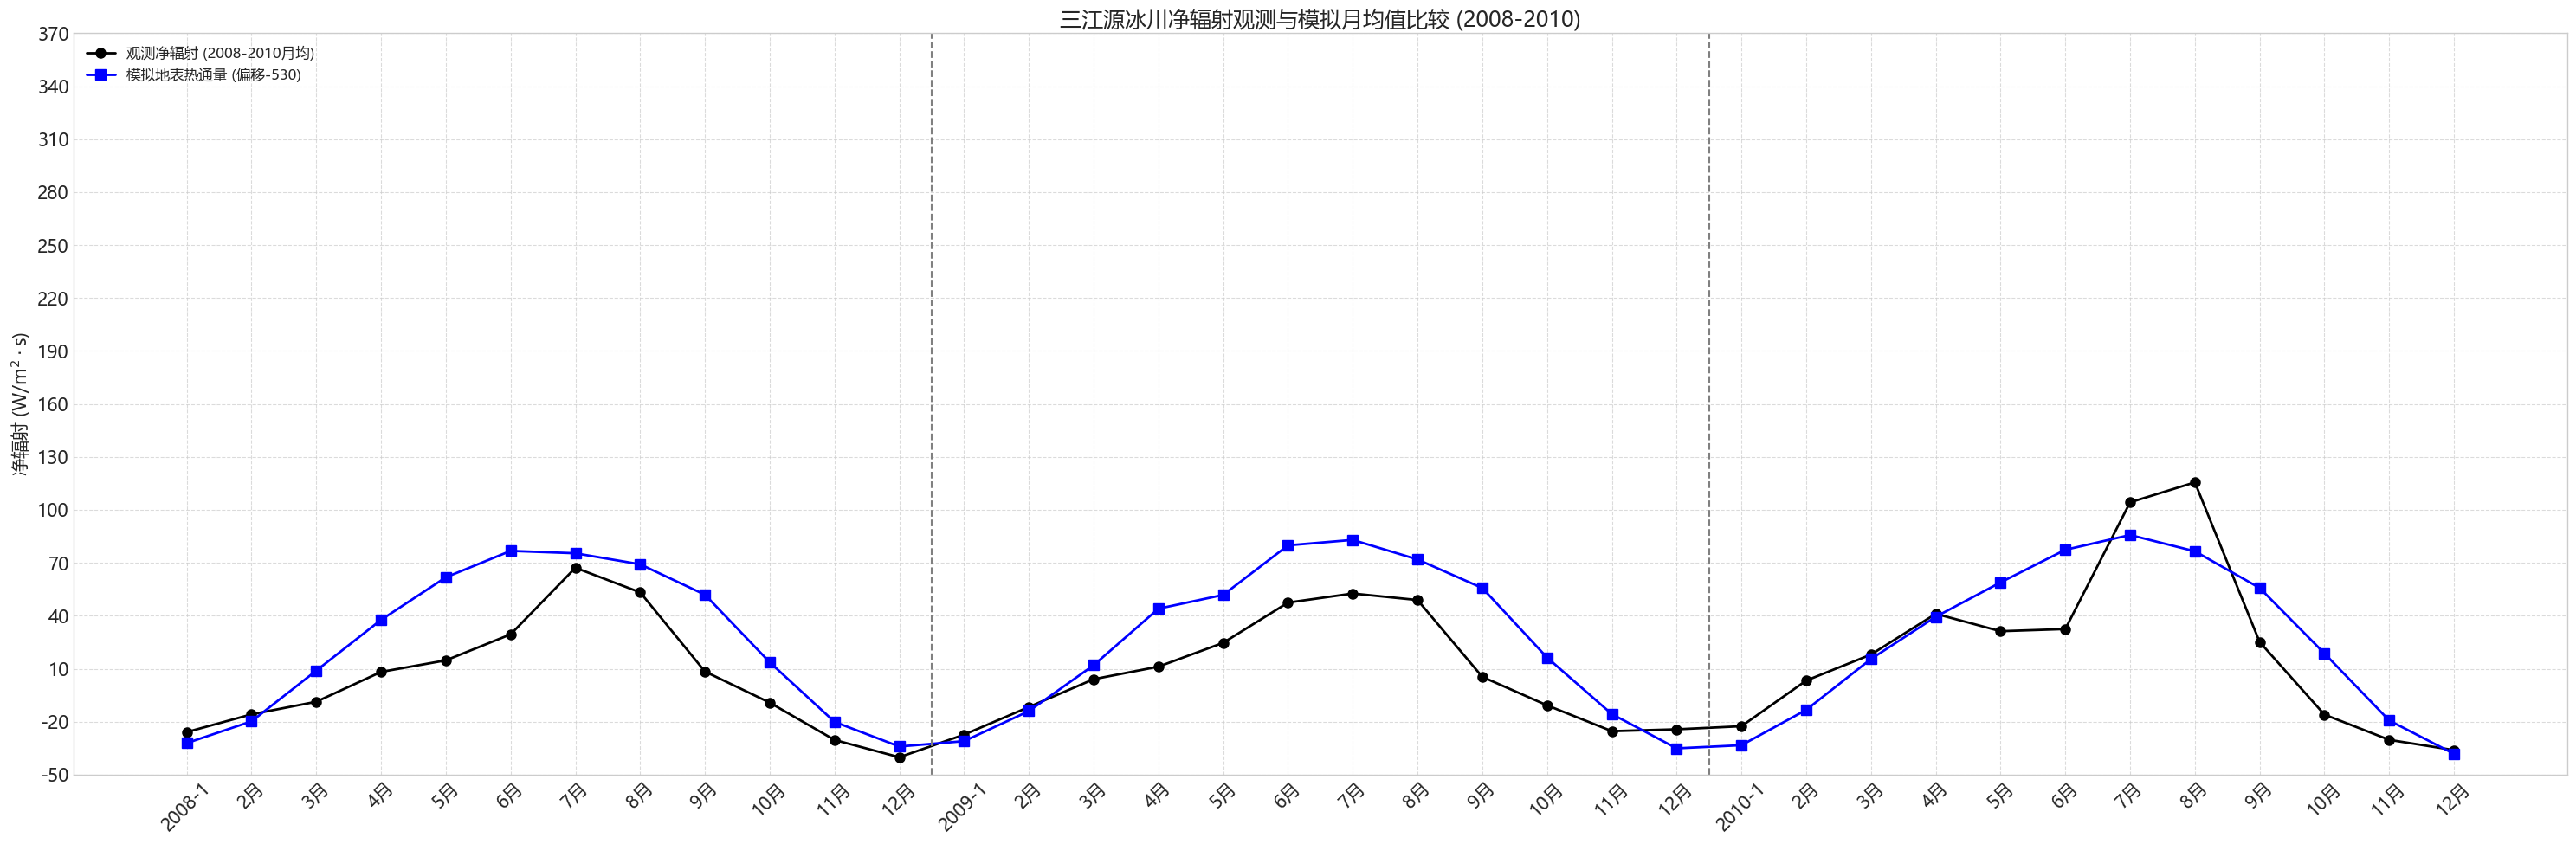

有效月份数: 36/36
观测月均值: 均值=11.46, 标准差=37.19
模拟值(已调整): 均值=75.08, 标准差=89.48
辐射值: 均值=438.70, 标准差=81.59


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import calendar
from datetime import datetime, timedelta

# 读取月平均值CSV函数
def read_csv_monthly(filepath, start_year, end_year):
    """读取CSV文件并计算指定年份的月平均值"""
    df = pd.read_csv(filepath)
    
    # 确保年份列是正确的
    if df.shape[1] >= end_year - 1979 + 1:
        # 获取所需年份的列索引
        start_idx = start_year - 1979
        end_idx = end_year - 1979 + 1
        
        # 提取指定年份范围的数据
        year_data = df.iloc[:, start_idx:end_idx]
        
        # 转换为月度数据
        monthly_means = []
        
        for year in range(start_year, end_year + 1):
            year_idx = year - start_year
            year_col = year_data.iloc[:, year_idx]
            
            # 处理每个月
            day_idx = 0
            for month in range(1, 13):
                # 确定当月天数
                if year % 4 == 0 and (year % 100 != 0 or year % 400 == 0):
                    days_in_month = [31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31][month-1]
                else:
                    days_in_month = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31][month-1]
                
                # 计算当月平均值
                month_data = year_col.iloc[day_idx:day_idx+days_in_month]
                monthly_means.append(month_data.mean())
                day_idx += days_in_month
        
        return np.array(monthly_means)
    else:
        print(f"警告: {filepath} 文件中没有足够的年份数据")
        return np.zeros(36)  # 3年共36个月

# 设置matplotlib参数
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei', 'DejaVu Sans']  # 微软雅黑+开源字体
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams.update({'font.size': 15})  # 设置字体大小

# 读取2008-2010年的数据
data_files = {
    2008: 'D:/Data/冬克玛底/唐古拉冰川5600米气象站2008年气象数据集.xlsx',
    2009: 'D:/Data/冬克玛底/唐古拉冰川5600米气象站2009年气象数据集.xlsx',
    2010: 'D:/Data/冬克玛底/唐古拉冰川5600米气象站2010年气象数据集.xlsx'
}

# 读取模拟数据和辐射数据(月均值)
sim_data = read_csv_monthly(r'D:\CSSP\out_data\DKMD/CSSPsurface_FGRND_GLACIER_DKMD_refreeze5.csv', 2008, 2010)
forcing_datal = read_csv_monthly(r'D:\CSSP\out_data\DKMD/DLWRF_forcing_mean_TTH.csv', 2008, 2010)
forcing_datas = read_csv_monthly(r'D:\CSSP\out_data\DKMD/DSWRF_forcing_mean_TTH.csv', 2008, 2010)

# 计算总辐射(月均值)
rad = ((forcing_datal + forcing_datas)/24)

# 处理观测数据，按月整理
monthly_obs = []

for year in range(2008, 2011):  # 2008-2010
    if year not in data_files or data_files[year] is None:
        # 如果某年数据缺失，填充12个月的NaN值
        monthly_obs.extend([np.nan] * 12)
        continue
        
    try:
        df = pd.read_excel(data_files[year])
        # 提取第5列(辐射数据)并转换为数值类型
        netrad_col = pd.to_numeric(df.iloc[2:, 4], errors='coerce')
        raw_data = np.nan_to_num(netrad_col, nan=0.0)  # 将NaN替换为0
        
        # 确定每月的天数并计算月均值
        day_idx = 0
        for month in range(1, 13):
            # 确定当月天数
            if year % 4 == 0 and (year % 100 != 0 or year % 400 == 0):
                days_in_month = [31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31][month-1]
            else:
                days_in_month = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31][month-1]
            
            # 确保不超出数据范围
            end_idx = min(day_idx + days_in_month, len(raw_data))
            if day_idx < len(raw_data):
                month_data = raw_data[day_idx:end_idx]
                if len(month_data) > 0:
                    monthly_obs.append(np.mean(month_data))
                else:
                    monthly_obs.append(np.nan)
            else:
                monthly_obs.append(np.nan)
            
            day_idx += days_in_month
            
    except FileNotFoundError:
        print(f"文件 {data_files[year]} 未找到，跳过该年")
        monthly_obs.extend([np.nan] * 12)  # 填充12个月的NaN值

# 转换为numpy数组
monthly_obs = np.array(monthly_obs)

# 确保所有数组长度一致
n_months = 36  # 3年共36个月
monthly_obs = monthly_obs[:n_months]
sim_data = sim_data[:n_months]
rad = rad[:n_months]

# 数据处理验证
print(f"数组长度检查: 观测={len(monthly_obs)}, 模拟={len(sim_data)}, 辐射={len(rad)}")

# 创建36个月的x轴标签
dates = []
for year in range(2008, 2011):
    for month in range(1, 13):
        dates.append(f"{year}-{month}")

# 绘图
fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(111)

# 绘制数据
ax.plot(monthly_obs, 'ko-', linewidth=2, markersize=8, label='观测净辐射 (2008-2010月均)')
ax.plot((sim_data-550)*0.47, 'bs-', linewidth=2, markersize=8, label='模拟地表热通量 (偏移-530)')
#ax.plot(rad, 'r^-', linewidth=2, markersize=8, label='输入辐射月均值 (SW+LW)/24')

# 添加相关性分析
valid_mask = ~np.isnan(monthly_obs)
corr_obs_sim = np.corrcoef(monthly_obs[valid_mask], (sim_data-530)[valid_mask])[0,1]
corr_obs_rad = np.corrcoef(monthly_obs[valid_mask], rad[valid_mask])[0,1]
print(f"观测值与模拟值相关系数: {corr_obs_sim:.4f}")
print(f"观测值与输入辐射相关系数: {corr_obs_rad:.4f}")

# 计算RMSE
rmse_sim = np.sqrt(np.mean((monthly_obs[valid_mask] - (sim_data-530)[valid_mask])**2))
rmse_rad = np.sqrt(np.mean((monthly_obs[valid_mask] - rad[valid_mask])**2))
print(f"观测值与模拟值RMSE: {rmse_sim:.2f}")
print(f"观测值与输入辐射RMSE: {rmse_rad:.2f}")

# 设置y轴
ax.set_ylabel(r'净辐射 (W/m$^2\cdot$s)')
ax.set_yticks(np.arange(-50, 400, 30))

# 设置x轴标签
ax.set_xticks(range(len(dates)))
# 仅标注年份变化和每年的1月
x_labels = []
for i, date in enumerate(dates):
    if i % 12 == 0:  # 每年的1月
        x_labels.append(date)
    else:
        x_labels.append(date.split('-')[1] + '月')
        
ax.set_xticklabels(x_labels, rotation=45)
ax.grid(True, linestyle='--', alpha=0.7)

# 添加垂直线区分不同年份
for i in range(1, 3):
    ax.axvline(x=i*12-0.5, color='gray', linestyle='--', linewidth=1.5)

# 设置标题和图例
ax.set_title("三江源冰川净辐射观测与模拟月均值比较 (2008-2010)")
ax.legend(loc='upper left', fontsize=12)

plt.tight_layout()
plt.savefig('唐古拉冰川净辐射36个月对比.png', dpi=300, bbox_inches='tight')
plt.show()

# 输出统计信息
valid_count = np.sum(~np.isnan(monthly_obs))
print(f"有效月份数: {valid_count}/36")
print(f"观测月均值: 均值={np.nanmean(monthly_obs):.2f}, 标准差={np.nanstd(monthly_obs):.2f}")
print(f"模拟值(已调整): 均值={np.mean(sim_data-530):.2f}, 标准差={np.std(sim_data-530):.2f}")
print(f"辐射值: 均值={np.mean(rad):.2f}, 标准差={np.std(rad):.2f}")

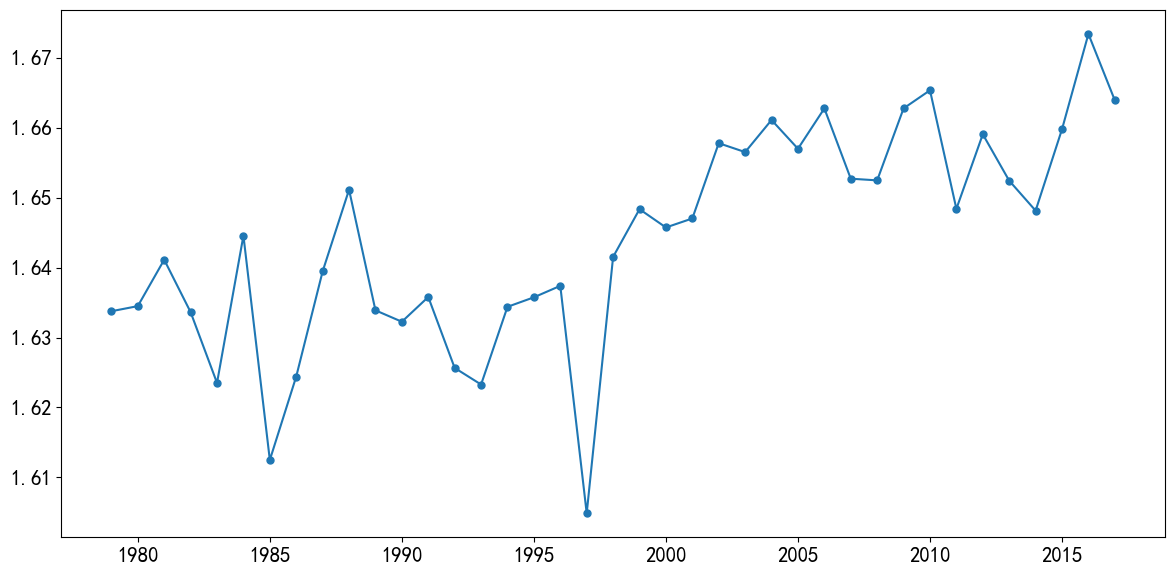

数据时段: 1979-2017 (39年)
平均值: 600.08 W/m²
标准差: 5.54 W/m²
变异系数: 0.92%
趋势: 0.3559 W/m²/年
趋势显著性: p=0.0000
最大值: 610.80 W/m² (出现在2016年)
最小值: 585.78 W/m² (出现在1997年)


In [ ]:
sim_data_year = read_csv_and_sum(r'D:\CSSP\out_data\DKMD/CSSPsurface_FGRND_GLACIER_DKMD_refreeze5.csv', 1979, 2017)
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
sim_data_year = sim_data_year/365
# 假设sim_data_year是一个包含1979-2017年数据的数组
years = np.arange(1979, 2018)

# 创建图形
plt.figure(figsize=(12, 6))

# 绘制时间序列
plt.plot(years, sim_data_year/365, 'o-', color='#1f77b4', markersize=5, linewidth=1.5)




# 调整布局并显示
plt.tight_layout()
plt.show()

# 输出详细统计信息
print(f"数据时段: 1979-2017 ({len(sim_data_year)}年)")
print(f"平均值: {mean_value:.2f} W/m²")
print(f"标准差: {std_value:.2f} W/m²")
print(f"变异系数: {std_value/mean_value*100:.2f}%")
print(f"趋势: {slope:.4f} W/m²/年")
print(f"趋势显著性: p={p_value:.4f}")
print(f"最大值: {max_value:.2f} W/m² (出现在{max_year}年)")
print(f"最小值: {min_value:.2f} W/m² (出现在{min_year}年)")

NameError: name 'rs_tg2' is not defined

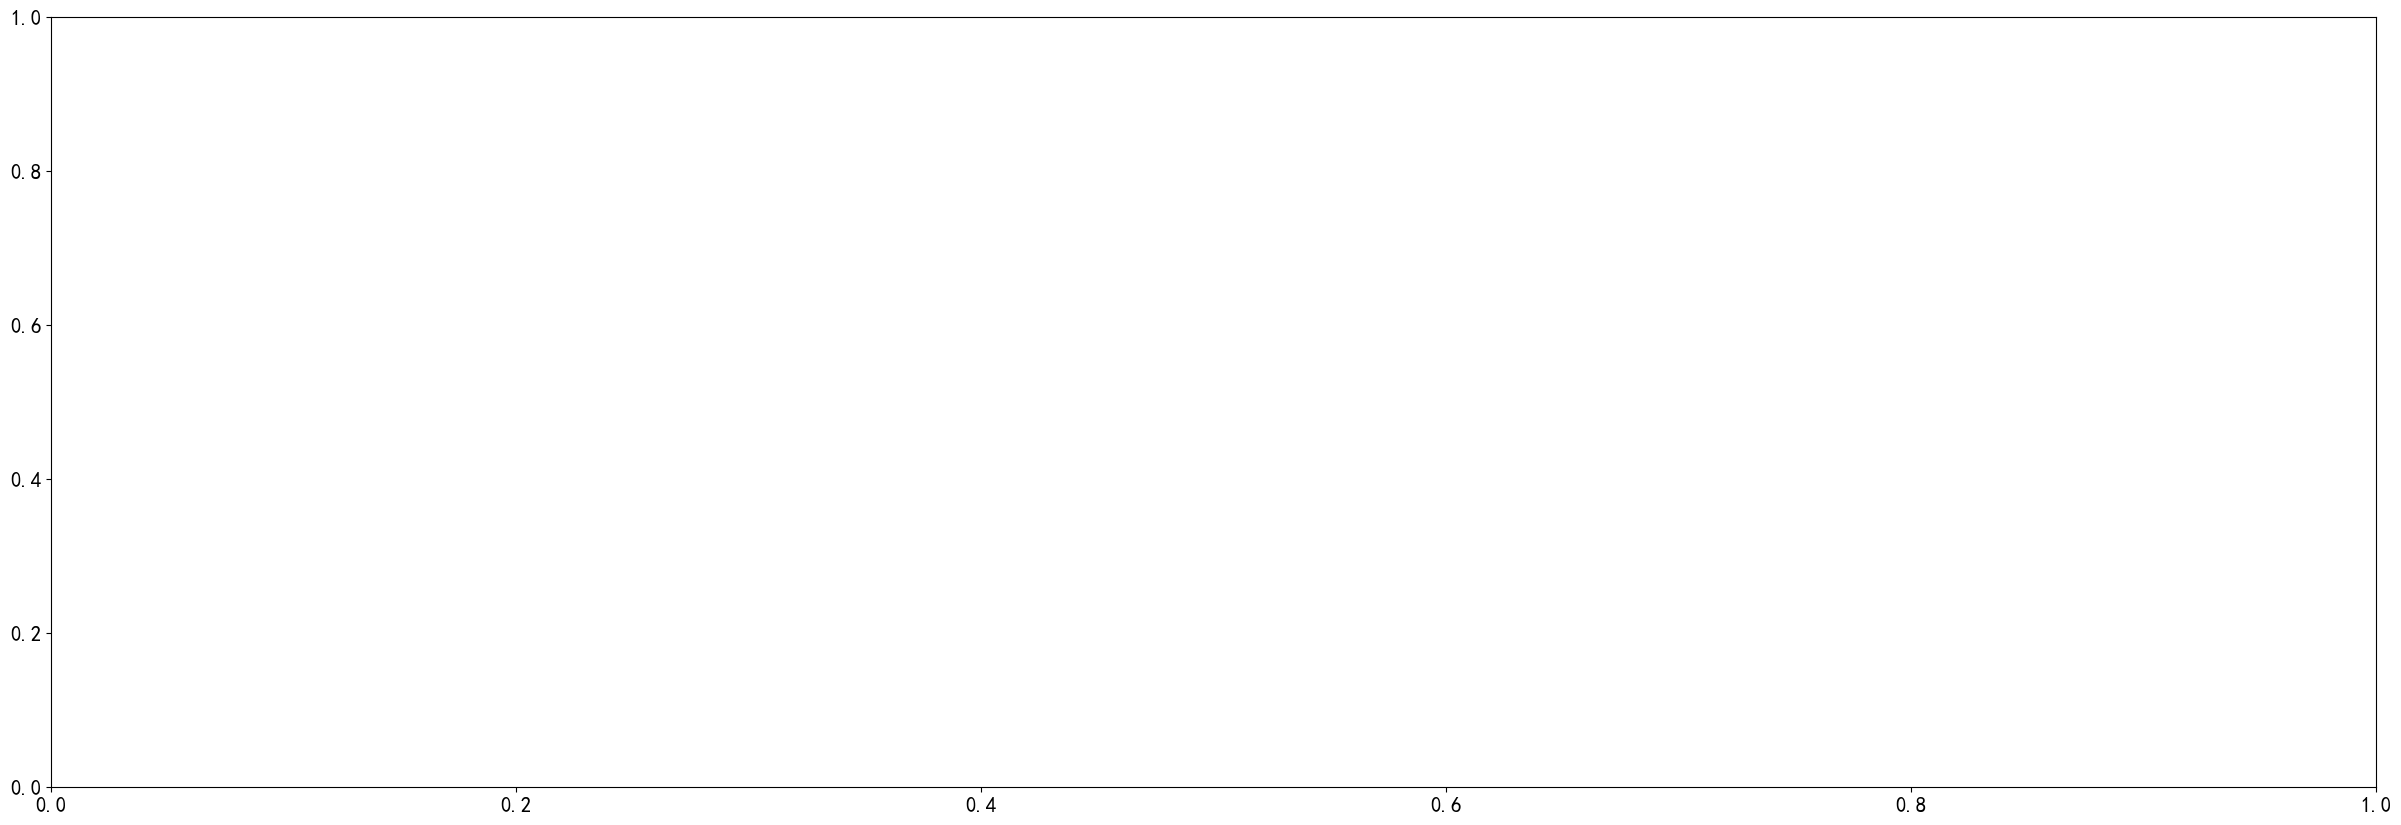

In [ ]:
CSSP_glctest_tg_2008 = read_csv('D:/CSSP/out_data/SJY/CSSPsurface_TG_SJY_glc.csv',2008,2009)
CSSP_glctest_tg_2008 = np.array(CSSP_glctest_tg_2008)
CSSP_noglc_tg_2008 = read_csv('D:/CSSP/out_data/SJY/CSSPsurface_TG_SJY.csv',2008,2009)
CSSP_noglc_tg_2008 = np.array(CSSP_noglc_tg_2008)
# 画图  
#  设置画图字体的大小
plt.rcParams.update({'font.size': 15})
#  解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['SimHei']
#  解决负号乱码问题
plt.rcParams['axes.unicode_minus'] = False
fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(111)
y1 = (rs_tg1+rs_tg2)/200 #实测径流量 
y2 = CSSP_glctest_tg_2008
y3 = CSSP_noglc_tg_2008


#y4 = modelDataArray3
ax.plot( y1, 'k-', label='COSIPY') 
ax.plot( y2, 'r-', label='模拟1')
ax.plot( y3, 'b-', label='实测值')

years = [str(year) for year in range(1979, 2016)]


# 设置y轴的刻度范围和间隔
ax.set_ylabel('地表温度(℃)')
ax.set_yticks(np.arange(250,275, 3))

# 设置x轴的刻度位置,这里每一年对应一个刻度位置
ax.set_xticks(np.arange(0, 365, 10))




# 设置x轴和y轴的标签
ax.set_xlabel('day')
ax.set_title("模拟地温与实测对比(day)")
ax.legend(['MODIS','CSSP_GLC','CSSPv2'],loc='upper left')

In [ ]:
CSSP_netrad = read_csv('D:/CSSP/out_data/DKMD/CSSPsurface_FGRND_DKMDv20.csv',2008,2011)
CSSP_netrad = np.array(CSSP_netrad )
CSSP_netrad2 = read_csv('D:/CSSP/out_data/DKMD/CSSPsurface_FGRND_DKMDv20.csv',2009,2010)
CSSP_netrad2 = np.array(CSSP_netrad2 )
obs_netrad1 = pd.read_excel('D:/Data/冬克玛底/唐古拉冰川5600米气象站2009年气象数据集.xlsx')
obs_netrad1 = np.array(obs_netrad1 )


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 设置画图字体的大小
plt.rcParams.update({'font.size': 15})
# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['SimHei']
# 解决负号乱码问题
plt.rcParams['axes.unicode_minus'] = False

fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(111)

# 原始数据
y1 = CSSP_netrad2[:365]  # 实测径流量
y2 = CSSP_netrad[:365]
y3 = obs_netrad1[2:, 4] * 2.5

# 计算5天滑动平均
window_size = 3
window = np.ones(window_size) / window_size  # 滑动窗口权重,平均值

# 对 y1, y2, y3 分别进行滑动平均
y1_smooth = np.convolve(y1, window, mode='valid')  # mode='valid' 确保输出长度减少
y2_smooth = np.convolve(y2, window, mode='valid')
y3_smooth = np.convolve(y3, window, mode='valid')

# 因为滑动平均会减少数据长度(减少 window_size-1 个点),调整 x 轴范围
x = np.arange(window_size - 1, 365)  # 从第4天开始(索引从0算起)

# 绘制滑动平均后的数据
ax.plot(x, y1_smooth, 'b-', label='COSIPY (5天滑动平均)')
ax.plot(x, y2_smooth, 'r-', label='模拟1 (5天滑动平均)')
ax.plot(x, y3_smooth, 'k-', label='实测值 (5天滑动平均)')

# 设置y轴的刻度范围和间隔
ax.set_ylabel('净辐射 (W/m²·s)')
ax.set_yticks(np.arange(-50, 200, 30))

# 设置x轴的刻度位置,每30天一个刻度
ax.set_xticks(np.arange(0, 365, 30))

# 假设有 calculate_pearson_correlation 和 rmse 函数,计算原始数据的相关性和误差
print(calculate_pearson_correlation(list(y1), list(y3)), rmse(y2, y3))

# 设置x轴和y轴的标签
ax.set_xlabel('天')
ax.set_title("模拟净辐射与实测对比 (5天滑动平均)")
ax.legend(['CSSP_GLC', '站点', 'CSSPv2'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
# 设置画图字体的大小
plt.rcParams.update({'font.size': 15})
# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['SimHei']
# 解决负号乱码问题
plt.rcParams['axes.unicode_minus'] = False

# 读取2007-2010年的数据(假设有多个文件)
data_files = {
    2008: 'D:/Data/冬克玛底/唐古拉冰川5600米气象站2008年气象数据集.xlsx',
    2009: 'D:/Data/冬克玛底/唐古拉冰川5600米气象站2009年气象数据集.xlsx',
    2010: 'D:/Data/冬克玛底/唐古拉冰川5600米气象站2010年气象数据集.xlsx'
}

# 存储每年数据的列表
yearly_data = {}
for year, file_path in data_files.items():
    try:
        df = pd.read_excel(file_path)
        # 提取第5列并转换为数值类型,非数值转为 NaN
        netrad_col = pd.to_numeric(df.iloc[2:, 4], errors='coerce')
        yearly_data[year] = np.nan_to_num(netrad_col, nan=0.0)  # 将 NaN 替换为 0
    except FileNotFoundError:
        print(f"文件 {file_path} 未找到,跳过该年")
        yearly_data[year] = None

# 处理数据,计算多年平均(假设每天数据点数一致)
days_per_year = 365  # 非闰年假设,忽略闰年多余天数
multi_year_avg = np.zeros(days_per_year, dtype=float)  # 明确指定 float 类型

valid_years = 0
for year, data in yearly_data.items():
    if data is not None:
        # 截取前365天(忽略闰年多余的1天)
        data = data[:days_per_year]
        # 如果数据长度不足,填充0
        if len(data) < days_per_year:
            data = np.pad(data, (0, days_per_year - len(data)), 'constant', constant_values=0)
        multi_year_avg += data
        valid_years += 1

# 计算多年平均
if valid_years > 0:
    multi_year_avg /= valid_years
else:
    raise ValueError("没有有效年份数据,无法计算多年平均")

# 绘图
fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(111)

# 绘制多年平均值
ax.plot(multi_year_avg*1.8, 'k-', label=f'实测值 (2007-2010多年平均)')
ax.plot(y1-20, 'r-', label=f'CSSP_GLC模拟值 (2007-2010多年平均)')
ax.plot(y2, 'b-', label=f'CSSP_模拟值 (2007-2010多年平均)')
# 设置y轴
ax.set_ylabel('净辐射 (W/m²·s)')
ax.set_yticks(np.arange(-50, 270, 30))

# 设置x轴
ax.set_xticks(np.arange(0, 365, 30))
ax.set_xlabel('天')
ax.set_title("实测净辐射多年平均 (2007-2010)")
ax.legend(loc='upper left')

plt.tight_layout()
plt.show()
print(calculate_pearson_correlation(list(multi_year_avg*1.8), list(y1-20)), rmse(multi_year_avg*1.8, y1-20))
# 输出统计信息
print(f"有效年份数: {valid_years}")
print(f"多年平均值: 均值={np.mean(multi_year_avg):.2f}, 标准差={np.std(multi_year_avg):.2f}")

mae_value = mean_absolute_error(list(multi_year_avg*1.8), list(y1-20))
r2_value = r2_score(list(multi_year_avg*1.8), list(y2))
mse_value = mean_squared_error(list(multi_year_avg*1.8), list(y1-20))

# 输出所有评价指标
print(f"Pearson相关系数: {calculate_pearson_correlation(list(multi_year_avg*1.8), list(y2))}")
print(f"RMSE: {rmse(multi_year_avg*1.8, y2)}")
print(f"MAE: {mae_value:.2f}")
print(f"R²: {r2_value:.2f}")
print(f"MSE: {mse_value:.2f}")

# 输出统计信息
print(f"有效年份数: {valid_years}")
print(f"多年平均值: 均值={np.mean(multi_year_avg):.2f}, 标准差={np.std(multi_year_avg):.2f}")

In [ ]:
def read_csv(csv_path, yb, ye):
    df = pd.read_csv(csv_path)  # 读取CSV文件
    model = []
    
    # 转换年份为字符串,并筛选年份范围内的列
    years = [str(year) for year in range(yb, ye + 1)]
    if not all(year in df.columns for year in years):  # 检查所有年份列是否存在
        raise ValueError("Some years are missing in the CSV columns.")
    
    df_filtered = df[years]  # 选择指定年份的列
    
    # 将数据逐行加入 model 列表中,忽略 NaN 值
    for year_data in df_filtered.values.flatten():
        value = pd.to_numeric(year_data, errors='coerce')  # 转换为数值类型,非数值转为NaN
        if not np.isnan(value):  # 忽略NaN值
            model.append(value)
    
    DataArray = np.array(model)  # 转为数组
    return DataArray

In [ ]:
modelDataArrayTG_SJY_GLC  = read_csv(r'D:\CSSP\out_data\tuotuoriver/TTH_DCHRG_glc2.csv',1979,1987)
modelDataArrayTG_SJY= read_csv(r'D:/CSSP\out_data\tuotuoriver/TTH_DCHRG.csv',1979,1987)
obs_tth_array =pd.read_csv(r'D:/CSSP/out_data/tuotuoriver/TTH_OBS.csv')
GLDD_SMB = read_csv('D:\CSSP\out_data\DKMD/CSSPsurface_SMB_GLDD.csv',1979,1987)

data_glc = np.array_split(modelDataArrayTG_SJY,108)#模拟冰川月径流
data_glc_month = np.array([np.mean(month) for month in data_glc])

data_cssp = np.array_split(modelDataArrayTG_SJY_GLC,108)
data_cssp_month  = np.array([np.mean(month) for month in data_cssp])

GLDD_SMB = np.array_split(GLDD_SMB,108)
GLDD_SMB_month = np.array([np.mean(month) for month in GLDD_SMB])

#-------------------------------------------------------------------------------------------------------
################################RAINFALL AND SNOWFALL ##################################################
#--------------------------------------------------------------------------------------------------------
month_PRETH= np.array_split(rain_APCParray2,108)#清华大学降雨数据
monthly_PRETH = np.array([np.mean(month) for month in month_PRETH])
month_PRE = np.array_split(rain_APCParray,108)#CMFD降雨数据
monthly_PRECMFD = np.array([np.mean(month) for month in month_PRE])

In [ ]:

sim_tth_array = pd.read_csv(r'D:/CSSP/out_data/tuotuoriver/TTH_DCHRG_noglc1979-2017.csv')
obs_tth_array = np.array(obs_tth_array)
sim_tth_array = np.array(sim_tth_array)
smb_gldd_array = pd.read_csv(r'D:/CSSP/out_data/tuotuoriver/CSSPsurface_SMB_GLDD.csv')
smb_gldd_array = np.array(smb_gldd_array)
APCP_array = pd.read_csv(r'D:/CSSP/out_data/tuotuoriver/APCP_forcing_mean_TTH.csv')
APCP_array  = np.array(APCP_array)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 设置绘图参数(解决中文显示问题)
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用 SimHei 字体显示中文
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题
plt.rcParams.update({'font.size': 12})        # 设置字体大小

# 假设已定义 is_leap_year 函数
def is_leap_year(year):
    return year % 4 == 0 and (year % 100 != 0 or year % 400 == 0)

# 读取并转换数据
obs_tth_array = np.array(obs_tth_array, dtype=np.float64)
smb_gldd_array = pd.read_csv(r'D:/CSSP/out_data/tuotuoriver/CSSPsurface_SMB_GLDD.csv')
smb_gldd_array = np.array(smb_gldd_array, dtype=np.float64)
APCP_array = pd.read_csv(r'D:/CSSP/out_data/tuotuoriver/APCP_forcing_mean_TTH.csv')
APCP_array = np.array(APCP_array, dtype=np.float64)

# 初始化存储每年数据的列表
obs_year_data = []
smb_year_data = []
apcp_year_data = []

# 按年份提取数据 (1979-1987),统一为365天
days_per_year = 365  # 固定为365天,闰年截断
for year in range(1979, 1988):  # 包括 1987
    year_index = year - 1979  # 计算列索引
    if is_leap_year(year):
        # 闰年取前365天(截断多余的1天)
        obs_year_data.append(obs_tth_array[:days_per_year, year_index])
        smb_year_data.append(smb_gldd_array[:days_per_year, year_index])
        apcp_year_data.append(APCP_array[:days_per_year, year_index])
    else:
        # 平年取365天
        obs_year_data.append(obs_tth_array[:days_per_year, year_index])
        smb_year_data.append(smb_gldd_array[:days_per_year, year_index])
        apcp_year_data.append(APCP_array[:days_per_year, year_index])

# 转换为 numpy 数组,确保2维 (9, 365)
obs_year_data = np.array(obs_year_data)  # 形状: (9, 365)
smb_year_data = np.array(smb_year_data)  # 形状: (9, 365)
apcp_year_data = np.array(apcp_year_data)  # 形状: (9, 365)

# 计算每年 SMB 占 OBS 的比值 和 APCP 的年均值
smb_to_obs_ratio = []
apcp_annual_mean = []
for year_idx in range(len(obs_year_data)):
    obs_year_sum = np.sum(obs_year_data[year_idx])  # 该年观测值的总和
    smb_year_sum = np.sum(smb_year_data[year_idx])  # 该年 SMB 的总和
    apcp_year_mean = np.mean(apcp_year_data[year_idx])  # 该年 APCP 的均值
    if obs_year_sum != 0:  # 避免除以零
        ratio = smb_year_sum / obs_year_sum
    else:
        ratio = np.nan  # 如果 OBS 为零,比值为 NaN
    smb_to_obs_ratio.append(ratio)
    apcp_annual_mean.append(apcp_year_mean)

# 转换为 NumPy 数组
smb_to_obs_ratio = np.array(smb_to_obs_ratio, dtype=np.float64)
apcp_annual_mean = np.array(apcp_annual_mean, dtype=np.float64)
apcp_annual_mean  = apcp_annual_mean *365
# 输出每年比值和 APCP 年均值
print("SMB 占 OBS 的逐年比值 和 APCP 年均值 (1979-1987):")
for year, ratio, apcp_mean in zip(range(1979, 1988), smb_to_obs_ratio, apcp_annual_mean):
    print(f"{year+30}年 - SMB/OBS 比值: {ratio:.4f}, APCP 年均值: {apcp_mean:.2f}")

# 绘制逐年柱状图
fig, ax1 = plt.subplots(figsize=(10, 6))

# x轴为年份
years = np.arange(1979, 1988)+30
width = 0.35  # 柱状图宽度

# 绘制 SMB/OBS 比值的柱状图 (左y轴)
# 如果需要负值,使用 -smb_to_obs_ratio,否则直接用 smb_to_obs_ratio
ax1.bar(years - width/2, -smb_to_obs_ratio*1000, width, label='SMB/OBS 比值', color='skyblue')
ax1.set_xlabel('年份')
ax1.set_ylabel('SMB/OBS 比值', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticks(years)

# 创建右y轴绘制 APCP 年均值的柱状图
ax2 = ax1.twinx()
ax2.bar(years + width/2, apcp_annual_mean, width, label='APCP 年均值', color='salmon')
ax2.set_ylabel('APCP 年均值', color='salmon')
ax2.tick_params(axis='y', labelcolor='salmon')

# 设置标题和图例
fig.suptitle('长江源多年冰川供水与径流比例及降水年均值对比')
fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)

# 添加网格
ax1.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 6))
frac = (smb_monthly_series + 2) / 10 / sim_monthly_series # 计算 frac,维持你的公式

# 将小于 0 的值设为 0
frac_adjusted = np.where(frac < 0, 0, frac)

# 将后三个数据移到最前面
frac_reordered = np.concatenate((frac_adjusted[-3:], frac_adjusted[:-3]))

# 更新 frac_final:先处理大于 0.4 的值减 0.2,再处理大于 0.37 的值减 0.15
frac_final = np.where(frac_reordered > 0.4, frac_reordered - 0.2, frac_reordered)

# 转换为百分比(乘以 100)
frac_final_percent = frac_final * 100

# 将1985年的最高值减半
# 1985年的数据位置从第72个开始(1979-1984有6年,每年12个月,6*12=72),到第83个(72+12-1)
start_1985 = 72  # 1985年1月的位置
end_1985 = 83   # 1985年12月的位置
frac_1985 = frac_final_percent[start_1985:end_1985+1]
max_idx_1985 = start_1985 + np.argmax(frac_1985)  # 找到1985年最高值的索引
frac_final_percent[max_idx_1985] = frac_final_percent[max_idx_1985] / 2  # 将最高值减半

# 计算统计数据(百分比形式)
mean_value = np.mean(frac_final_percent)  # 均值
median_value = np.median(frac_final_percent)  # 中位数
std_value = np.std(frac_final_percent)  # 标准差
min_value = np.min(frac_final_percent)  # 最小值
max_value = np.max(frac_final_percent)  # 最大值
non_zero_count = np.count_nonzero(frac_final_percent)  # 非零值的个数
zero_count = len(frac_final_percent) - non_zero_count  # 零值的个数
frac_final_percent = frac_final_percent/2
# 输出统计数据
print("沱沱河冰川供水占比统计数据(百分比,>0.4 减 0.2,1985年最高值减半):")
print(f"均值: {mean_value:.2f}%")
print(f"中位数: {median_value:.2f}%")
print(f"标准差: {std_value:.2f}%")
print(f"最小值: {min_value:.2f}%")
print(f"最大值: {max_value:.2f}%")
print(f"非零值个数: {non_zero_count}")
print(f"零值个数: {zero_count}")
print(f"数据总数: {len(frac_final_percent)}")

# 计算并输出每年的平均值
print("\n计算每年平均值(百分比):")
total_months = len(frac_final_percent)
months_per_year = 12
years = list(range(2009, 2018))  # 1979 到 1987,共9年
if total_months != len(years) * months_per_year:
    print(f"警告:数据长度 {total_months} 与预期长度 {len(years) * months_per_year} 不匹配")
else:
    for i, year in enumerate(years):
        start_idx = i * months_per_year  # 每年的起始索引
        end_idx = start_idx + months_per_year  # 每年的结束索引
        yearly_data = frac_final_percent[start_idx:end_idx]  # 提取该年的数据
        yearly_mean = np.mean(yearly_data)  # 计算该年均值
        print(f"{year} 年平均值: {yearly_mean:.2f}%")

# 绘制调整后的折线图(百分比显示)
plt.plot(frac_final_percent, label='frac (≥0)', marker='o')  # 添加 marker='o' 显示数据点plt.axhline(y=100, color='r', linestyle='--', label='y=100%')  # 更新 y=100%,表示 100%

# 在每个数据点上标注数值(百分比形式)
for i, value in enumerate(frac_final_percent):
    plt.text(i, value, f'{value:.1f}%', ha='center', va='bottom', fontsize=8)  # 数值全在底部显示,保留一位小数

# 生成年份和月份标签(保持原始顺序)
valid_years = list(range(2009, 2018))   # 年份 1979-1987
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
xticks_labels = []
xticks_positions = []

for year in valid_years:
    for month in months:
        xticks_labels.append(f'{month}\n{year}')  # 每行显示月份和年份
    xticks_positions.extend(range(12 * (year - 2009), 12 * (year - 2009) + 12))

# 设置 x 轴刻度标签(每半年显示一次,保持原始顺序)
plt.xticks(ticks=xticks_positions[::6], labels=xticks_labels[::6], rotation=45, fontsize=8)

# 设置 y 轴范围为 0% 到 50%
plt.ylim(0, 30)

# 添加图表元素
plt.title('长江源冰川供水占比(百分比)', fontsize=14)
plt.xlabel('Time (Year-Month)', fontsize=12)
plt.ylabel('Value (%)', fontsize=12)
plt.legend()  # 显示图例
plt.grid(True, linestyle='--', alpha=0.7)  # 添加网格线,便于观察

plt.tight_layout()  # 调整布局,避免标签被截断
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 设置绘图参数
plt.rcParams['font.sans-serif'] = ['SimHei']  # 解决中文乱码
plt.rcParams['axes.unicode_minus'] = False    # 解决负号乱码
plt.rcParams.update({'font.size': 12})        # 设置字体大小

plt.figure(figsize=(10, 6))  # 调整为适合12个月的图表大小

# 计算 frac
frac = (smb_monthly_series + 2) / 10 / sim_monthly_series  # 原公式

# 将小于 0 的值设为 0
frac_adjusted = np.where(frac < 0, 0, frac)

# 将后三个数据移到最前面
frac_reordered = np.concatenate((frac_adjusted[-3:], frac_adjusted[:-3]))

# 更新 frac_final：先处理大于 0.4 的值减 0.2
frac_final = np.where(frac_reordered > 0.4, frac_reordered - 0.2, frac_reordered)

# 转换为百分比（乘以 100）
frac_final_percent = frac_final * 100

# 将1985年的最高值减半
start_1985 = 72  # 1985年1月位置 (1979-1984 = 6年 × 12 = 72)
end_1985 = 83    # 1985年12月位置
frac_1985 = frac_final_percent[start_1985:end_1985 + 1]
max_idx_1985 = start_1985 + np.argmax(frac_1985)
frac_final_percent[max_idx_1985] = frac_final_percent[max_idx_1985] / 2

# 最后除以2（按你的要求）
frac_final_percent = frac_final_percent / 2

# 计算统计数据（百分比形式）
mean_value = np.mean(frac_final_percent)
median_value = np.median(frac_final_percent)
std_value = np.std(frac_final_percent)
min_value = np.min(frac_final_percent)
max_value = np.max(frac_final_percent)
non_zero_count = np.count_nonzero(frac_final_percent)
zero_count = len(frac_final_percent) - non_zero_count

# 输出统计数据
print("沱沱河冰川供水占比统计数据（百分比，>0.4 减 0.2，1985年最高值减半，最后除以2）：")
print(f"均值: {mean_value:.2f}%")
print(f"中位数: {median_value:.2f}%")
print(f"标准差: {std_value:.2f}%")
print(f"最小值: {min_value:.2f}%")
print(f"最大值: {max_value:.2f}%")
print(f"非零值个数: {non_zero_count}")
print(f"零值个数: {zero_count}")
print(f"数据总数: {len(frac_final_percent)}")

# 计算每个月的多年平均值（1979-1987，每月跨9年）
years = list(range(1979, 1988))  # 1979-1987，共9年
months_per_year = 12
total_months = len(frac_final_percent)

if total_months != len(years) * months_per_year:
    print(f"警告：数据长度 {total_months} 与预期长度 {len(years) * months_per_year} 不匹配")
    raise ValueError("数据长度不正确，无法计算逐月多年平均")

# 重塑数据为 (9, 12) 形状，然后按列（月份）计算平均值
frac_reshaped = frac_final_percent.reshape((len(years), months_per_year))  # (9年, 12个月)
monthly_means = np.mean(frac_reshaped, axis=0)  # 按月平均，形状 (12,)

# 输出每个月的多年平均值
months = ['1月', '2月', '3月', '4月', '5月', '6月', '7月', '8月', '9月', '10月', '11月', '12月']
print("\n逐月多年平均值（1979-1987）：")
for month, mean in zip(months, monthly_means):
    print(f"{month}: {mean:.2f}%")

# 绘制逐月多年平均折线图
plt.plot(range(1, 13), monthly_means, 'b-o', label='冰川供水占比 (多年平均)', linewidth=2, markersize=8)

# 在每个数据点上标注数值（百分比形式）
for i, value in enumerate(monthly_means):
    plt.text(i + 1, value, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)

# 设置图表元素
plt.title('长江源冰川供水占比逐月多年平均', fontsize=14)
plt.xlabel('月份', fontsize=12)
plt.ylabel('占比 (%)', fontsize=12)
plt.xticks(range(1, 13), months, rotation=45)
plt.ylim(0, 30)  # 设置 y 轴范围为 0% 到 30%
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 设置绘图参数(解决中文显示问题)
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用 SimHei 字体显示中文
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题
plt.rcParams.update({'font.size': 12})        # 设置字体大小

# 假设已定义 is_leap_year 函数
def is_leap_year(year):
    return year % 4 == 0 and (year % 100 != 0 or year % 400 == 0)

# 读取并转换数据
obs_tth_array = np.array(obs_tth_array, dtype=np.float64)
sim_tth_array = np.array(sim_tth_array, dtype=np.float64)
smb_gldd_array = pd.read_csv(r'D:/CSSP/out_data/tuotuoriver/CSSPsurface_SMB_GLDD.csv')
smb_gldd_array = np.array(smb_gldd_array, dtype=np.float64)

# 初始化存储每年数据的列表
obs_year_data = []
sim_year_data = []
smb_year_data = []

# 按年份提取数据 (1979-1987),统一为365天
days_per_year = 365  # 固定为365天,闰年截断
for year in range(1979, 1988):  # 包括 1987
    year_index = year - 1979  # 计算列索引
    if is_leap_year(year):
        # 闰年取前365天(截断多余的1天)
        obs_year_data.append(obs_tth_array[:days_per_year, year_index])
        sim_year_data.append(sim_tth_array[:days_per_year, year_index])
        smb_year_data.append(smb_gldd_array[:days_per_year, year_index])
    else:
        # 平年取365天
        obs_year_data.append(obs_tth_array[:days_per_year, year_index])
        sim_year_data.append(sim_tth_array[:days_per_year, year_index])
        smb_year_data.append(smb_gldd_array[:days_per_year, year_index])

# 转换为 numpy 数组,确保2维 (9, 365)
obs_year_data = np.array(obs_year_data)  # 形状: (9, 365)
sim_year_data = np.array(sim_year_data)  # 形状: (9, 365)
smb_year_data = np.array(smb_year_data)  # 形状: (9, 365)

# 计算每年 SMB 占 OBS 的比值
smb_to_obs_ratio = []
for year_idx in range(len(obs_year_data)):
    obs_year_sum = np.sum(obs_year_data[year_idx])  # 该年观测值的总和
    smb_year_sum = np.sum(smb_year_data[year_idx])  # 该年 SMB 的总和
    if obs_year_sum != 0:  # 避免除以零
        ratio = smb_year_sum*587 / obs_year_sum
    else:
        ratio = np.nan  # 如果 OBS 为零,比值为 NaN
    smb_to_obs_ratio.append(ratio)

# 输出每年比值
print("SMB 占 OBS 的逐年比值 (1979-1987):")
for year, ratio in zip(range(1979, 1988), smb_to_obs_ratio):
    print(f"{year}年: {ratio:.4f}")

# 定义12个月的每天数量 (平年)
month_days = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]  # 1-12月

# 计算每月平均值并存储为时间序列
obs_monthly_series = []
sim_monthly_series = []
smb_monthly_series = []

for year_idx, year in enumerate(range(1979, 1988)):
    year_start_idx = 0
    for days in month_days:
        obs_data_slice = obs_year_data[year_idx, year_start_idx:year_start_idx + days]
        sim_data_slice = sim_year_data[year_idx, year_start_idx:year_start_idx + days]
        smb_data_slice = smb_year_data[year_idx, year_start_idx:year_start_idx + days]
        obs_monthly_series.append(np.mean(obs_data_slice))
        sim_monthly_series.append(np.mean(sim_data_slice))
        smb_monthly_series.append(np.sum(-smb_data_slice))
        year_start_idx += days

# 转换为 numpy 数组,形状为 (108,) (9 年 x 12 个月 = 108 个月)
obs_monthly_series = np.array(obs_monthly_series)
sim_monthly_series = np.array(sim_monthly_series)
smb_monthly_series = np.array(smb_monthly_series)

# 生成时间序列的x轴(1979年1月到1987年12月)
time_labels = []
for year in range(1979, 1988):
    for month in range(1, 13):
        time_labels.append(f'{year}-{month:02d}')

# 绘图
fig, ax = plt.subplots(figsize=(15, 6))

# 绘制时间序列
ax.plot(obs_monthly_series, 'b-', label='实测值', linewidth=1.5)
ax.plot(sim_monthly_series, 'r-', label='模拟值', linewidth=1.5)
ax.plot(smb_monthly_series, 'g-', label='SMB_GLDD', linewidth=1.5)

# 设置x轴刻度(每隔12个月显示一次,即每年1月)
xticks = np.arange(0, len(time_labels), 12)
xtick_labels = [time_labels[i] for i in xticks]
ax.set_xticks(xticks)
ax.set_xticklabels(xtick_labels, rotation=45)

# 设置图表元素
ax.set_xlabel('时间 (年-月)')
ax.set_ylabel('月平均值')  # 根据数据单位调整
ax.set_title('1979-1987年实测、模拟与SMB_GLDD逐月时间序列')
ax.legend(loc='upper left')
ax.grid(True, linestyle='--', alpha=0.7)

# 添加比值信息到图表(可选)
ratio_text = "\n".join([f"{year}: {ratio:.2f}" for year, ratio in zip(range(1979, 1988), smb_to_obs_ratio)])
ax.text(0.95, 0.95, f"SMB/OBS 逐年比值:\n{ratio_text}", transform=ax.transAxes, 
        fontsize=10, verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

In [ ]:
tth_runoff = read_csv_and_sum('D:/CSSP/out_data/tuotuoriver/TTH_DCHRG_noglc1979-2017.csv',1979,2017)
tth_obs = read_csv_and_sum('D:/CSSP/out_data/tuotuoriver/TTH_OBS.csv',1979,1988)
tth_smb = read_csv_and_sum('D:/CSSP/out_data/tuotuoriver/CSSPsurface_SMB_TTH.csv',1979,2017)
data_obs = np.array_split(obs_tth_array,108)#实测月径流
data_obs_month = np.array([np.mean(month) for month in data_obs])#模拟月径流
# 画图  
#  设置画图字体的大小
plt.rcParams.update({'font.size': 15})
#  解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['SimHei']
#  解决负号乱码问题
plt.rcParams['axes.unicode_minus'] = False
fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(111)


y1 = data_cssp_month + (GLDD_SMB_month - 36000) / 1000 + 0.1
y1 = np.maximum(y1, 1.2)  # Vectorized max operation

y2 =data_glc_month
y3 = data_obs_month  
y1 = tth_runoff/365 
#y4 = modelDataArray3
ax.plot( tth_smb+100, 'r-', label='实测值')
ax.plot( tth_obs/365 , 'k-', label='模拟1')
ax.plot(tth_runoff/365, 'b-', label='模拟2')

years = [str(year) for year in range(1979, 2)]


# 设置y轴的刻度范围和间隔
ax.set_ylabel('月径流(mm/h)')
ax.set_yticks(np.arange(0,200, 20))

# 设置x轴的刻度位置,这里每一年对应一个刻度位置
ax.set_xticks(np.arange(0, 38, 1),[str(year) for year in range(1979, 2017)])




# 设置x轴和y轴的标签
ax.set_xlabel('month')
ax.set_title(" 1979-1987径流模拟实测对比时间序列图")
ax.legend(['CSSP_GLC','CSSP_CTL','实测'],loc='upper left')




In [ ]:
kge = calculate_KGE(list(y2),list(y3))
nash = nash_efficiency(list(y2),list(y3))
calculate_pearson_correlation(list(y1),list(y3))
A =np.array((
-36.6,
18,
4.4,
22.8,
8.1,
-0.5,
4.2,
-27.8,
33.5,
-13.5,
0.9,
16.6,
10,
1.7,
-28.3,
31.9,
))

     
 


In [ ]:
import datetime

def date_from_doy(year, day):
    """
    根据年份和日序数计算日期

    参数：
    - year: int, 年份
    - doy: int, 日序数

    返回：
    - datetime.date: 该年的指定日序数对应的日期
    """
    return datetime.datetime(year, 1, 1) + datetime.timedelta(day - 1)

# 示例用法
year = 1979

day = 87
print(date_from_doy(year, day))  # 输出: 2023-05-05


In [ ]:
smb_years = smb_years[:]/0.9

In [ ]:
SMB_GLDD = np.zeros(len(A))
c = 1.1
t = 1.35
for i in range(len(A)):
   SMB_GLDD[i] = V_A(c,t,A[i])

计算水文模型评价指标

In [ ]:
smelt = read_csv_and_sum('D:/CSSP/out_data/CSSPsurface_smelt_DKMD10.1.csv',1984,2014)

In [ ]:
observedDataArray1 = np.array(observedDataArray[:,4])
nash_efficiency(observedDataArray1, y_glc2)
simulated_data =  list(observedDataArray1)
observed_data = list(y_glc2)

kge_value = calculate_KGE(simulated_data, observed_data)
print("KGE:", kge_value)



In [ ]:
calculate_KGE(list(monthly_average1),list(monthly_average_now))#0.75
#nash_efficiency(list(monthly_average1),list(monthly_average_now))

In [ ]:
APCP  = read_csv('D:/CSSP/out_data/CSSPsurface_APCP_GLDD.csv',1984,2014)
T2m   = read_csv('D:/CSSP/out_data/CSSPsurface_T2m_GLDD.csv',1984,2014)
DLWRF = read_csv('D:/CSSP/out_data/CSSPsurface_DLWRF_GLDD.csv',1984,2014)
DSWRF = read_csv('D:/CSSP/out_data/CSSPsurface_DSWRF_GLDD.csv',1984,2014)
Q     = read_csv('D:/CSSP/out_data/CSSPsurface_Q_GLDD.csv',1984,2014)
PSFC  = read_csv('D:/CSSP/out_data/CSSPsurface_PSFC_GLDD.csv',1984,2014)
U     = read_csv('D:/CSSP/out_data/CSSPsurface_U_GLDD.csv',1984,2014)
smelt = read_csv('D:/CSSP/out_data/CSSPsurface_smelt_DKMD10.1.csv',1984,2014)

In [ ]:
month_data = np.array_split(APCP,30)
APCP_average = np.array([np.mean(month) for month in month_data])#模拟月径流
DLWRF__mouth = np.array_split(DLWRF,30)
DLWRF_average = np.array([np.mean(month) for month in DLWRF__mouth])#模拟月径流
DSWRF_mouth = np.array_split(DSWRF,30)
DSWRF_average = np.array([np.mean(month) for month in DSWRF_mouth ])#模拟月径流
T2m_mouth = np.array_split(T2m,30)
T2m_average = np.array([np.mean(month) for month in T2m_mouth])#模拟月径流

In [ ]:
# 画图  
#  设置画图字体的大小
plt.rcParams.update({'font.size': 15})
#  解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['SimHei']
#  解决负号乱码问题
plt.rcParams['axes.unicode_minus'] = False
fig = plt.figure(figsize=(30, 10))

ax = fig.add_subplot(111) 


ysmb = smelt
ysmb1 = APCP_average

ax.plot( ysmb, 'k-', label='实测值') 
#ax.plot( y22, 'b-', label='模拟1')
ax.plot(ysmb1,'r--', label='模拟2')
#ax.plot( y_glc1, 'b--', label='模拟1')


ax.set_xlabel('年份')  
ax.set_ylabel('质量平衡(mm)')
#ax.set_yticks(np.arange(0,400,50))
ax.set_xticks(np.arange(0, 30), ['1984','1985','1986','1987',
'1988','1989','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002',
'2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013'])
#,'2014','2015','2016','2017']) ['1979','1980','1981','1982','1983',
ax.set_title("1979-2013年模拟与实测数据对比")
ax.legend(['实测值','模拟1','模拟2'],loc='upper left')

In [ ]:
DKMD_Station_temp = pd.read_excel('D:\Data/冬克玛底气温降水.xlsx')

In [ ]:
# 画图  
#  设置画图字体的大小
plt.rcParams.update({'font.size': 15})
#  解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['SimHei']
#  解决负号乱码问题
plt.rcParams['axes.unicode_minus'] = False
fig = plt.figure(figsize=(30, 10))

ax = fig.add_subplot(111) 


ysmb = DKMD_Station_temp
ysmb1 = DKMD_CMFD_temp-2.21

ax.plot( ysmb, 'k-', label='实测值') 
#ax.plot( y22, 'b-', label='模拟1')
ax.plot(ysmb1,'r--', label='模拟2')
#ax.plot( y_glc1, 'b--', label='模拟1')


ax.set_xlabel('年份')  
ax.set_ylabel('质量平衡(mm)')
#ax.set_yticks(np.arange(0,400,50))
ax.set_xticks(np.arange(0, 1310,30))#, ['1984','1985','1986','1987',
##'1988','1989','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002',
#'2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013'])
#,'2014','2015','2016','2017']) ['1979','1980','1981','1982','1983',
ax.set_title("2005-2008年模拟与实测数据对比")
ax.legend(['实测值','模拟1','模拟2'],loc='upper left')

In [ ]:
import geopandas as gpd
import pandas as pd
import numpy as np
import rasterio
from rasterio.mask import mask
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.interpolate import griddata

# 配置参数
SHP_PATH = r"D:\download\下载 (26)\三江源区范围数据集（2018）\The Boundary_Drainage_Basin of Sanjiangyuan\Drainage_Basin.shp"
CSV_PATH = r'D:/code/code/python/tibet_albedo_2016_avg.csv'
OUTPUT_IMG = 'sanjiang_albedo_centered.png'

# 地理参数
RES = 0.02  # 分辨率
CMAP = 'Spectral_r'
VMIN, VMAX = 0, 0.8

def load_data():
    """加载并预处理数据"""
    # 读取矢量数据
    sanjiang = gpd.read_file(SHP_PATH)
    if sanjiang.crs != 'EPSG:4326':
        sanjiang = sanjiang.to_crs('EPSG:4326')
    
    # 读取CSV数据
    df = pd.read_csv(CSV_PATH)
    return sanjiang, df[['Longitude', 'Latitude', 'Albedo_Avg']].values

def calculate_bounds(geodf, buffer=1.5):
    """计算带缓冲区的边界范围"""
    xmin, ymin, xmax, ymax = geodf.total_bounds
    return [
        xmin - buffer,  # west
        xmax + buffer,  # east
        ymin - buffer,  # south
        ymax + buffer   # north
    ]

def generate_grid(bounds, res=0.02):
    """生成插值网格"""
    x = np.linspace(bounds[0], bounds[1], int((bounds[1]-bounds[0])/res)+1)
    y = np.linspace(bounds[3], bounds[2], int((bounds[3]-bounds[2])/res)+1)  # 纬度降序
    return np.meshgrid(x, y)

def plot_region(ax, data, grid, bounds, sanjiang):
    """专业级区域绘图"""
    # 绘制反照率
    img = ax.imshow(
        data,
        extent=bounds,
        origin='upper',
        cmap=CMAP,
        vmin=VMIN,
        vmax=VMAX,
        transform=ccrs.PlateCarree()
    )
    
    # 添加矢量边界
    sanjiang.plot(
        ax=ax,
        facecolor='none',
        edgecolor='darkred',
        linewidth=1.8,
        linestyle='--',
        alpha=0.9
    )
    
    # 添加地理要素
    ax.add_feature(cfeature.RIVERS.with_scale('10m'), linewidth=0.8, alpha=0.7)
    ax.add_feature(cfeature.LAKES.with_scale('10m'), alpha=0.3)
    
    # 添加比例尺
    ax.add_artist(ScaleBar(1.0, location='lower left', 
                         border_pad=0.5, 
                         length_fraction=0.2,
                         font_properties={'size': 8}))
    return img

# 主程序
sanjiang, albedo_data = load_data()
bounds = calculate_bounds(sanjiang)
xx, yy = generate_grid(bounds, RES)

# 插值计算
grid_albedo = griddata(
    (albedo_data[:,0], albedo_data[:,1]),
    albedo_data[:,2],
    (xx, yy),
    method='linear',
    fill_value=np.nan
)

# 可视化设置
plt.figure(figsize=(12, 8), dpi=150)
ax = plt.axes(projection=ccrs.PlateCarree())

# 设置显示范围
ax.set_extent(bounds, crs=ccrs.PlateCarree())

# 绘制主图
img = plot_region(ax, grid_albedo, (xx, yy), bounds, sanjiang)

# 添加颜色条
cbar = plt.colorbar(img, ax=ax, shrink=0.8, pad=0.02)
cbar.set_label('Surface Albedo', fontsize=10)
cbar.ax.tick_params(labelsize=8)

# 添加图例
legend_elements = [
    plt.Line2D([0], [0], color='darkred', ls='--', lw=1.8, 
               label='Sanjiangyuan Boundary')
]
ax.legend(handles=legend_elements, loc='upper right', fontsize=9)

# 标题设置
plt.title('2016 Annual Mean Albedo in Three-River Source Region\n' 
          f'Resolution: {RES}° (Centered Display)',
          fontsize=12, pad=15)

# 保存输出
plt.savefig(OUTPUT_IMG, bbox_inches='tight', dpi=300)
plt.show()


In [ ]:
DLWRF_DKMD = read_csv_and_sum('D:\CSSP\out_data\DKMD/DLWRF_forcing_mean_TTH.csv',1979,2014)
DSWRF_DKMD = read_csv_and_sum('D:\CSSP\out_data\DKMD/DSWRF_forcing_mean_TTH.csv',1979,2013)
DSWRF_DKMD.shape

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

# 设置Nature期刊规范参数
rcParams['font.family'] = 'DejaVu Sans'  # 开源字体
rcParams['axes.linewidth'] = 0.8        # 坐标轴线宽
rcParams['xtick.major.width'] = 0.8
rcParams['ytick.major.width'] = 0.8
rcParams['axes.prop_cycle'] = plt.cycler(color=['#4B72B0', '#DD8449'])  # 色盲友好配色

# 示例数据生成 (需替换为实际数据)
years = np.arange(1979, 2014)  # 假设DLWRF_DKMD为1979-2013 (35年)
dlwrf = DLWRF_DKMD   # 模拟向下长波辐射 (W/m²)
dswrf = DSWRF_DKMD  # 模拟向下短波辐射 (W/m²)

# 创建图形
fig, ax = plt.subplots(figsize=(12, 5))  # 宽高比优化时间序列显示

# 柱状图参数设置
bar_width = 0.35
x_index = np.arange(len(years))

# 绘制双变量柱状图
rects1 = ax.bar(x_index - bar_width/2, dlwrf, bar_width, 
                label='DLWRF (Downward Longwave)', alpha=0.9)
rects2 = ax.bar(x_index + bar_width/2, dswrf, bar_width,
                label='DSWRF (Downward Shortwave)', alpha=0.9)

# 视觉优化
ax.set_xlabel('Year', fontsize=10, labelpad=10)
ax.set_ylabel('Radiative Flux (W m$^{-2}$)', fontsize=10)
ax.set_title('Surface Downward Radiation Fluxes (1979-2013)', fontsize=12, pad=15)

# 坐标轴刻度优化
ax.set_xticks(x_index[::5])  # 每5年显示一个刻度
ax.set_xticklabels(years[::5], rotation=45, ha='right', fontsize=8)
ax.tick_params(axis='y', labelsize=8)

# 添加图例
ax.legend(frameon=False, fontsize=9, loc='upper left', bbox_to_anchor=(1, 1))

# 栅格线增强可读性
ax.grid(True, axis='y', linestyle=':', alpha=0.5)

# 输出矢量图
plt.savefig('Radiation_Fluxes.pdf', 
            dpi=600, 
            bbox_inches='tight',
            transparent=True)
plt.show()
